## imports

In [1]:
from prediction_pipeline.preprocessing import *
from prediction_pipeline.build_sysmex_features import *
from prediction_pipeline.training import *
from sklearn.manifold import TSNE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch

In [2]:
#data_dir = "/Users/hippolyte/sysmex2pf/data"
data_dir = "/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/data_home"
training_data = "%s/training_exports" % data_dir

# Load Sysmex data

We load Sysmex data (cell-level measurements) and phenotypes (MPV, PLT, etc...)

## phenotypes

In [3]:
sys_phen = load_sys_phenotypes(data_dir)
sys_phen.to_hdf("%s/sys_phen.hdf" % training_data, key="sys_phen")
print("Sysmex phenotypes available for %d samples" % sys_phen.shape[0])

602 candidates summary files
Sysmex whole blood/March 2018/02032018/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/March 2018/02032018/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/March 2018/05032018/05032018_C1939H/XN_00-22

Sysmex whole blood/September 2017/20092019/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/September 2017/20092019/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/September 2017/26092017/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['

Sysmex whole blood/November 2017/30112017/30112017_C18SMA/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/November 2017/30112017/30112017_C18SMA/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/November 2017/30112017/30112017_C18

Sysmex whole blood/November 2017/14112017/14112017_C18PX0/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/November 2017/14112017/14112017_C18PX0/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/October 2017/12102017_C18MFB/XN_00-

Sysmex whole blood/October 2017/27102017_C18NVC/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/October 2017/27102017_C18NVC/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/October 2017/09102017/09102017_C18M04/XN_00-22A (Build 

Sysmex whole blood/February 2018/19022018/19022018_C191H9/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/February 2018/19022018/19022018_C191H9/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/February 2018/14022018/XN_00-22A (B

Sysmex whole blood/February 2018/26022018/26022018_C192AJ/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/February 2018/26022018/26022018_C192AJ/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/February 2018/20022018_C191QS_C191S

Sysmex whole blood/July-Aug 2017/14082017/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/July-Aug 2017/14082017/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/July-Aug 2017/02082017/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nic

Sysmex whole blood/December 2017/21122017/XN_00-22A (Build 7)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', 'HYPO-He(%)',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)
'IPF(%)'
Sysmex whole blood/December 2017/21122017/XN_00-22A (Build 7)_SAMPLE_3.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', 'CELLPACK DCL', 'SULFOLYSER', 'Lysercell WNR',
       'Fluorocell WNR', 'Lysercell WDF', 'Fluorocell WDF', 'CELLPACK DFL',
       'Fluorocell RET', 'Fluorocell PLT', 'Lysercell WPC', 'Fluorocell WPC',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Priority Code'],
      dtype='object')
'PLT(10^9/L)'
Sysmex whole blood/December 2017/21122017/21122017_C18VCI/XN_00-22A (Build 7)_SAMPLE.c

Sysmex whole blood/UNICORN_Sysmex_XN/14012016/XN_00-18B (Build 1)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', '[HYPO-He(%)]',
       ...
       'Unnamed: 186', 'Unnamed: 187', 'Unnamed: 188', 'Unnamed: 189',
       'Unnamed: 190', 'Unnamed: 191', 'Unnamed: 192', 'Unnamed: 193',
       'Unnamed: 194', 'Unnamed: 195'],
      dtype='object', length=196)
'PLT(10^9/L)'
Sysmex whole blood/UNICORN_Sysmex_XN/22012016/XN_00-18B (Build 1)_SAMPLE_2.csv
Index(['Nickname', 'Analyzer ID', 'Date', 'Time', 'Rack', 'Position',
       'Sample No.', '[FRC%(%)]', '[FRC%/M]', '[HYPO-He(%)]',
       ...
       'Unnamed: 186', 'Unnamed: 187', 'Unnamed: 188', 'Unnamed: 189',
       'Unnamed: 190', 'Unnamed: 191', 'Unnamed: 192', 'Unnamed: 193',
       'Unnamed: 194', 'Unnamed: 195'],
      dtype='object', length=196)
'PLT(10^9/L)'
Sysmex whole blood/UNICORN_Sysmex_XN/18012016/XN_00-18B (Build 1)_SAMPLE_2.csv
Index(['Nickname'

In [4]:
sys_phen.sample(3)

,ID,exp,PLT_count,IPF,is_PLT_F,MPV,PDW,PCT,date
564,C0WYG7,wb,249,3.6,1,11.3,13.6,0.29,18012016
350,C19XXY,wb,384,1.3,1,9.5,10.8,0.35,20092018
17,C19PVX,wb,268,4.6,1,10.9,12.6,0.29,03072018


## cell-level

In [4]:
sys_df_init = load_Sysmex(data_dir)
sys_df_init.to_hdf("%s/sys_df_init.hdf" % training_data,key="sys_df_init")
wb_ids = sys_df_init.ID.unique().tolist()

648 candidates Sysmex WB files
Duplicate file for ID C18PNK : Sysmex whole blood/October 2017/11112017/10112017_C18PNK/FCS/[XN-20^12829][00-22A (Build 7)][Fcs][10112017_103414][C18PNKFB][PLT-F].fcs
Duplicate file for ID C18PPG : Sysmex whole blood/October 2017/11112017/10112017_C18PPG/FCS/[XN-20^12829][00-22A (Build 7)][Fcs][10112017_120048][C18PPGFB][PLT-F].fcs
Duplicate file for ID C18JSY : Sysmex whole blood/October 2017/02102017_C18JSY/02102017_positive/02102017_C18JSY/FCS/[XN-20^12829][00-22A (Build 7)][Fcs][02102017_092024][C18JSYFB][PLT-F].fcs
Duplicate file for ID C18JSY : Sysmex whole blood/October 2017/02102017_C18JSY/02102017_positive/02102017_C18JSY/repeat/FCS/[XN-20^12829][00-22A (Build 7)][Fcs][02102017_093246][C18JSYFB][PLT-F].fcs
Duplicate file for ID C19759 : Sysmex whole blood/April 2018/16042018/C19759_16042018/FCS/[XN-20^12829][00-22A (Build 7)][Fcs][16042018_152026][C19759FB][PLT-F].fcs
Duplicate file for ID C0WX14 : Sysmex whole blood/UNICORN_Sysmex_XN/Haematology

In [6]:
sys_df_init.sample(3)

,Side Fluorescence Signal,Forward Scatter Signal,Side Scatter Signal,ID,exp
13741025,87.0,75.0,45.0,C19C2W,wb
12378835,76.0,54.0,42.0,C196PA,wb
17498111,58.0,36.0,41.0,C0WXTM,wb


# PF FC phenotypes

## Loading

We load the FC phenotypes database

In [5]:
all_pheno_df = pd.read_csv("%s/metadata_PF/PLATELET_FUNCTION_KD_11062019.txt" % data_dir,sep="\t")
#all_pheno_df.loc[all_pheno_df.PROJECT == "PFC_4_U","PROJECT"] = "PFC_4"
del all_pheno_df["TIME"]

pf_unicorn = pd.read_csv("%s/metadata_PF/UNICORN_PF.csv" % data_dir,sep=";",decimal=",")
pf_unicorn.dropna(subset=["ID"],how="any",axis=0,inplace=True)
pf_unicorn["PROJECT"] = "PFC_4_U2"
rename = {"Date":"DATE", "ID":"SAMPLE_ID"}
for c in pf_unicorn.columns:
    if c[-3:] == "_PP":
        rename[c] = c[:-3]
pf_unicorn.rename(columns=rename,inplace=True)
rename = {}
for c in pf_unicorn.columns:
    if c[:2] in ["F_","P_"]:
        pf_unicorn[c] = pf_unicorn[c].astype(float)
        parts = c.split("_")
        marker = parts[0]
        ago = parts[1]
        if marker == "F":
            marker = "FIB"
        elif marker == "P":
            marker = "PSEL"
        parts[1] = marker
        parts[0] = ago
        rename[c] = "_".join(parts)
pf_unicorn.rename(columns=rename,inplace=True)
good_columns = all_pheno_df.columns
pf_unicorn = pf_unicorn[good_columns]

In [6]:
all_pheno_df.sample(3)

,PROJECT,SAMPLE_ID,DATE,REST_FIB_1,REST_FIB_2,REST_PSEL_1,REST_PSEL_2,ADP_FIB_1,ADP_FIB_2,CRP_FIB_1,...,PAR1_PSEL_1,PAR1_PSEL_2,PAR4_FIB_1,PAR4_FIB_2,PAR4_PSEL_1,PAR4_PSEL_2,TRAP_FIB_1,TRAP_FIB_2,TRAP_PSEL_1,TRAP_PSEL_2
1689,PFC_4_U,C0X0KG,22/01/16,1.36,1.40,16.55,15.97,55.29,54.98,33.53,...,82.37,80.66,17.84,22.12,65.18,68.67,3.71,4.23,40.29,44.64
111,PFC_1,100010100024,19/07/05,3.29,3.46,NaN,NaN,21.88,23.84,16.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,PFC_3,C064BC,12/06/13,2.09,NaN,17.00,NaN,20.43,21.85,54.38,...,95.80,96.13,52.19,49.76,96.81,96.65,20.60,13.81,73.75,76.04


In [7]:
#all_pheno_df = pd.concat([pf_unicorn,all_pheno_df],axis=0)

In [8]:
df = all_pheno_df.copy()

## QC of phenotypes

ADP - FIB : 2131
ADP - PSEL : 1686
CRP - FIB : 2134
CRP - PSEL : 2135
TRAP - FIB : 1186
TRAP - PSEL : 1186
PAR1 - FIB : 1184
PAR1 - PSEL : 1185
PAR4 - FIB : 1186
PAR4 - PSEL : 1185
Before Normalization
PROJECT
PFC_1     -1.098787
PFC_2     -0.550943
PFC_3     -2.035241
PFC_4     -0.065616
PFC_4_U   -0.130868
Name: ADP_FIB, dtype: float64
PROJECT
PFC_1      489
PFC_2      420
PFC_3      645
PFC_4      437
PFC_4_U     91
Name: ADP_FIB, dtype: int64
Before Normalization
PROJECT
PFC_1     -1.962329
PFC_3     -1.355818
PFC_4      1.148047
PFC_4_U    1.076130
Name: ADP_PSEL, dtype: float64
PROJECT
PFC_1      482
PFC_3      644
PFC_4      438
PFC_4_U     93
Name: ADP_PSEL, dtype: int64
Before Normalization
PROJECT
PFC_1     -0.424409
PFC_2     -1.482500
PFC_3     -0.104541
PFC_4     -0.769742
PFC_4_U   -1.078356
Name: CRP_FIB, dtype: float64
PROJECT
PFC_1      488
PFC_2      433
PFC_3      642
PFC_4      434
PFC_4_U     94
Name: CRP_FIB, dtype: int64
Before Normalization
PROJECT
PFC_1      0.

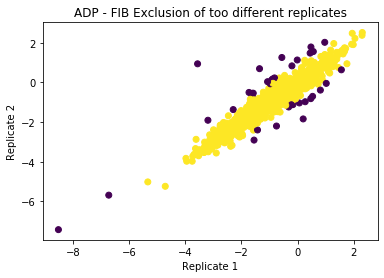

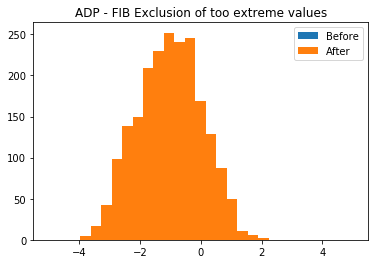

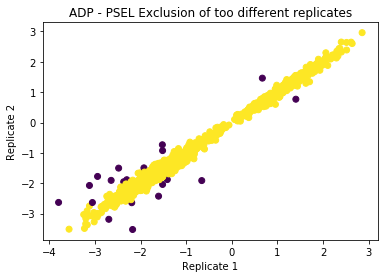

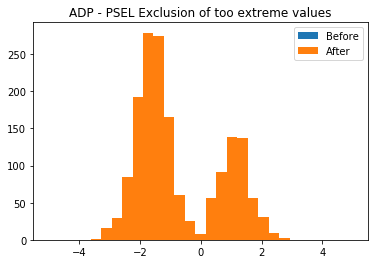

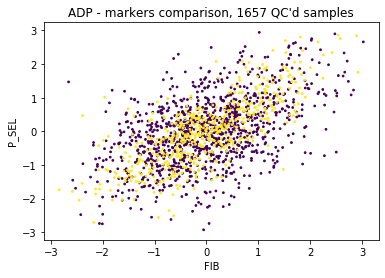

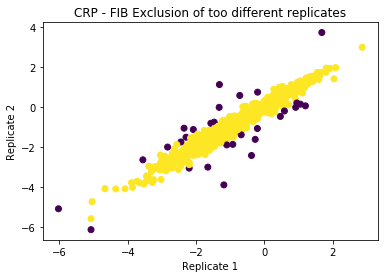

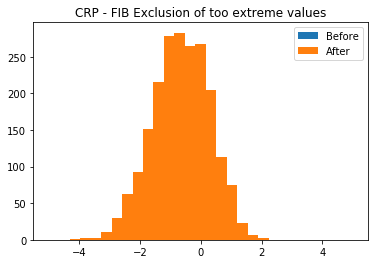

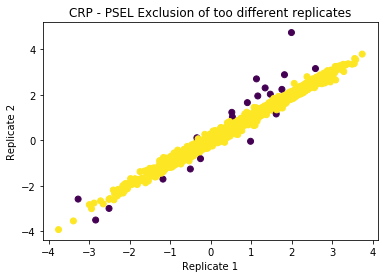

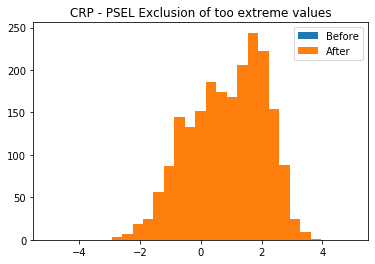

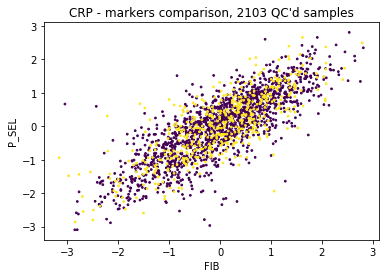

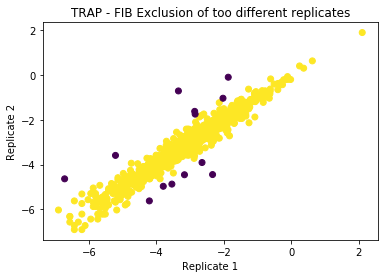

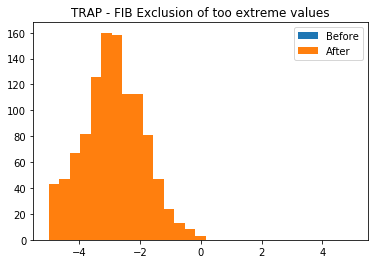

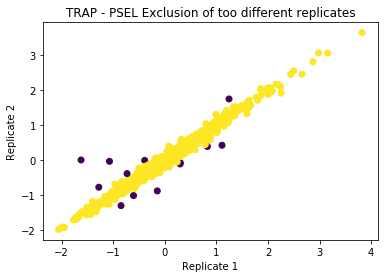

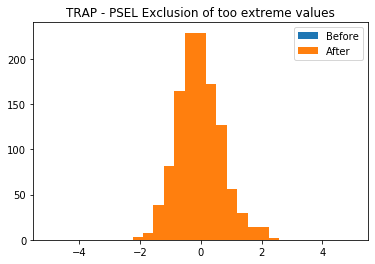

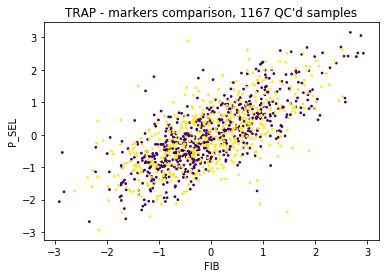

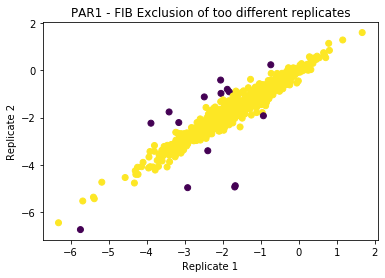

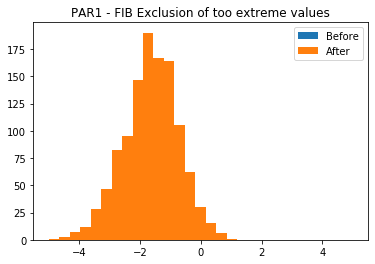

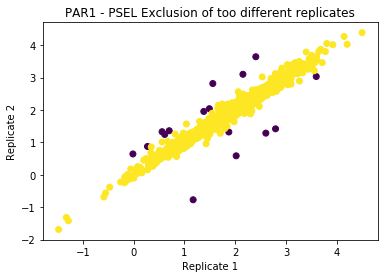

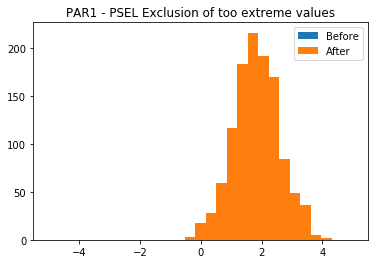

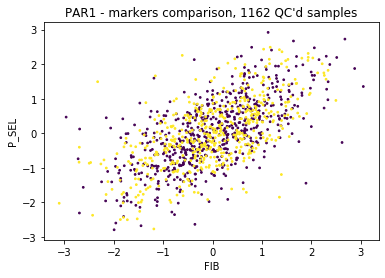

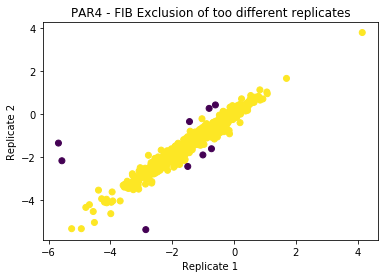

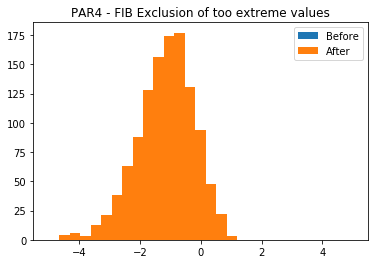

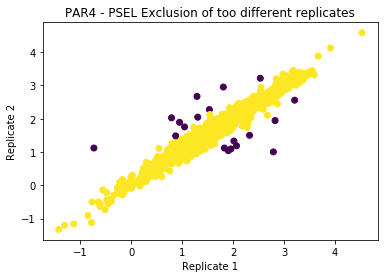

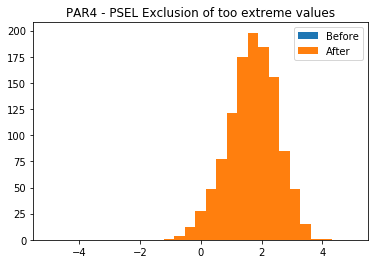

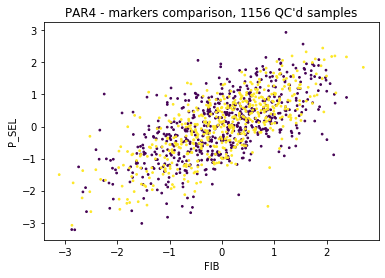

In [9]:
agonists = ["ADP","CRP","TRAP","PAR1","PAR4"]
for ago in agonists:
    for reag in ["FIB","PSEL"]:
        df["N_%s_%s" % (ago,reag)] = (1*~df["%s_%s_1" % (ago,reag)].isnull() + 1*~df["%s_%s_2" % (ago,reag)].isnull())
        # Do we check that there's at least one "REST" measurement ?
        # No ! This removed approx. 500 donors from the ADP cohort...
        # df["N_%s_%s" % (ago,reag)] *= 1*(~df["REST_%s_1"% reag].isnull() | ~df["REST_%s_2"% reag].isnull())
        df["OK_%s_%s" % (ago,reag)] = 1*(df["N_%s_%s" % (ago,reag)] == 2)
        print("%s - %s : %d" % (ago,reag, df["OK_%s_%s" % (ago,reag)].sum()))

# Move to logit

for c in df.columns:
    is_fc_measurement = False
    for ago in agonists + ["REST"]:
        if ago in str(c):
            is_fc_measurement = True
            break
    if is_fc_measurement == True:
        if df[c].dtype == np.float:
            df[c] = np.log(df[c] / (100. - df[c]))

# Actual QC

for ago in agonists:
    for marker in ["FIB", "PSEL"]:
        df["%s_%s_REP_DELTA" % (ago, marker)] = (df["%s_%s_1" % (ago, marker)] - df["%s_%s_2" % (ago, marker)])
        df["%s_%s_REP_OK" % (ago, marker)] = df["%s_%s_REP_DELTA" % (ago, marker)].abs() < 4*df["%s_%s_REP_DELTA" % (ago, marker)].abs().std()
        df["%s_%s" % (ago, marker)] = 0.5*(df["%s_%s_1" % (ago, marker)] + df["%s_%s_2" % (ago, marker)])
        plt.figure()
        plt.title("%s - %s Exclusion of too different replicates" % (ago, marker))
        plt.scatter(df.loc[df["OK_%s_%s" % (ago, marker)] == 1,"%s_%s_1" % (ago, marker)],
            df.loc[df["OK_%s_%s" % (ago, marker)] == 1,"%s_%s_2" % (ago, marker)],
            c = df.loc[df["OK_%s_%s" % (ago, marker)] == 1,"%s_%s_REP_OK" % (ago, marker)])
        plt.xlabel("Replicate 1")
        plt.ylabel("Replicate 2")

        df["%s_%s_VAL_OK" % (ago, marker)] = False
        for cohort in df.PROJECT.unique().tolist():
            inc_cond = (df["%s_%s_REP_OK" % (ago, marker)] == 1) & (df.PROJECT == cohort)
            df.loc[inc_cond,"%s_%s_VAL_OK" % (ago, marker)] = \
                (df.loc[inc_cond,"%s_%s" % (ago, marker)] - df.loc[inc_cond,"%s_%s" % (ago, marker)].mean()).abs() \
                < 3*df.loc[inc_cond,"%s_%s" % (ago, marker)].std()
        
        plt.figure()
        plt.title("%s - %s Exclusion of too extreme values" % (ago, marker))
            
        #b = np.linspace(df.loc[df["OK_%s_%s" % (ago, marker)]\
        #                *df["%s_%s_REP_OK" % (ago, marker)] == 1,"%s_%s" % (ago, marker)].min()-1,
        #               df.loc[df["OK_%s_%s" % (ago, marker)]\
        #                *df["%s_%s_REP_OK" % (ago, marker)] == 1,"%s_%s" % (ago, marker)].max()+1,30)

        b = np.linspace(-5,5,30)
        df["%s_%s_QC_OK" % (ago, marker)] = df["OK_%s_%s" % (ago, marker)]\
                        *df["%s_%s_REP_OK" % (ago, marker)]\
                        *df["%s_%s_VAL_OK" % (ago, marker)]
        df.loc[df["OK_%s_%s" % (ago,marker)]*\
                     df["%s_%s_QC_OK" % (ago,marker)] == 0,
                     "%s_%s" % (ago,marker)] = np.nan
        
        plt.hist(df.loc[df["OK_%s_%s" % (ago, marker)]\
                            *df["%s_%s_REP_OK" % (ago, marker)] == 1,"%s_%s" % (ago, marker)],bins=b,label="Before")
        plt.hist(df.loc[df["OK_%s_%s" % (ago, marker)]\
                        *df["%s_%s_REP_OK" % (ago, marker)]\
                        *df["%s_%s_VAL_OK" % (ago, marker)] == 1,"%s_%s" % (ago, marker)],bins=b,label="After")
        plt.legend()

        print("Before Normalization")
        print(df.loc[df["%s_%s_QC_OK" % (ago, marker)] == True].groupby("PROJECT")["%s_%s" % (ago, marker)].mean())
        print(df.loc[df["%s_%s_QC_OK" % (ago, marker)] == True].groupby("PROJECT")["%s_%s" % (ago, marker)].count())
        
        for cohort in df.PROJECT.unique().tolist():
            cohort_valid_cond = ~df["%s_%s" % (ago,marker)].isnull() & (df.PROJECT == cohort)
            df.loc[cohort_valid_cond,"%s_%s" % (ago,marker)] -= df.loc[cohort_valid_cond,"%s_%s" % (ago,marker)].mean()
            df.loc[cohort_valid_cond,"%s_%s" % (ago,marker)] /= df.loc[cohort_valid_cond,"%s_%s" % (ago,marker)].std()
    
    df[ago] = 0.5*(df["%s_%s" % (ago, "FIB")] + df["%s_%s" % (ago, "PSEL")])
    
    plt.figure()
    plt.title("%s - markers comparison, %d QC'd samples" % (ago, df["%s_%s_QC_OK" % (ago, marker)].sum()))
    plt.scatter(df.loc[df["%s_%s_QC_OK" % (ago, "FIB" )] & df["%s_%s_QC_OK" % (ago, "PSEL")] == True,"%s_%s" % (ago, "FIB")],
                df.loc[df["%s_%s_QC_OK" % (ago, "PSEL")] & df["%s_%s_QC_OK" % (ago, "FIB" )] == True,"%s_%s" % (ago, "PSEL")],
                c = df.loc[df["%s_%s_QC_OK" % (ago, "PSEL")] & df["%s_%s_QC_OK" % (ago, "FIB" )] == True,"PROJECT"].str.contains("4"),
                s=3)
    plt.xlabel("FIB")
    plt.ylabel("P_SEL")

## Adjust phenotypes

In [10]:
pheno_meta_df = pd.read_csv("%s/metadata_PF/PLATELET_FUNCTION_METADATA_KD_11062019.txt" % data_dir,sep="\t")

In [11]:
df = pd.merge(df,pheno_meta_df[["SAMPLE_ID","SEX","AGE","PLT","MPV"]],left_on="SAMPLE_ID",right_on="SAMPLE_ID")

### Sex

In [12]:
df.groupby("SEX")[["ADP","CRP","PAR1","PAR4","TRAP"]].mean()

,ADP,CRP,PAR1,PAR4,TRAP
SEX,,,,,
F,-0.049059,-0.03970,0.029172,-0.041867,0.014147
M,0.057448,0.03999,-0.012043,0.107828,-0.026578


No significant correlation with sex

### Age

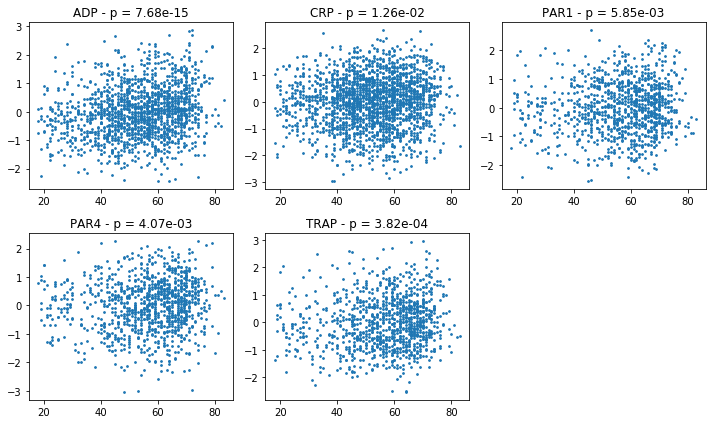

In [13]:
plt.figure(figsize=(10,6))
for i,pheno in enumerate(["ADP","CRP","PAR1","PAR4","TRAP"]):
    ax = plt.subplot(2,3,i+1)
    ax.scatter(df["AGE"],df[pheno],s=3)
    cond = ~(df.AGE.isnull() | df[pheno].isnull())
    stat = scipy.stats.pearsonr(df.loc[cond,"AGE"], df.loc[cond,pheno])
    ax.set_title("%s - p = %.2e" % (pheno,stat[1]))
plt.tight_layout()

Since we observe significant correlations, we adjust phenotypes by Age

In [14]:
pheno_columns = ["ADP_PSEL","ADP_FIB","ADP",
               "CRP_PSEL","CRP_FIB","CRP",
               "TRAP_PSEL","TRAP_FIB","TRAP",
               "PAR1_PSEL","PAR1_FIB","PAR1",
               "PAR4_PSEL","PAR4_FIB","PAR4"]

In [15]:
for p in pheno_columns:
    cond = ~(df.AGE.isnull() | df[pheno].isnull())
    X = np.reshape(df.loc[cond,"AGE"].copy().values,(-1,1))
    Y = df.loc[cond,pheno].copy()
    lm = LinearRegression().fit(X,Y)
    Y_adjust = Y - lm.predict(X)
    df[pheno] = np.nan
    df.loc[cond,pheno] = Y_adjust

### Time

We look at a potential variation in time

In [16]:
df.DATE = pd.to_datetime(df.DATE,format="%d/%m/%y")
day_1_pfc_4 = df.loc[df.PROJECT == "PFC_4","DATE"].min()
df["DAYS"] = (df.DATE - day_1_pfc_4).dt.days

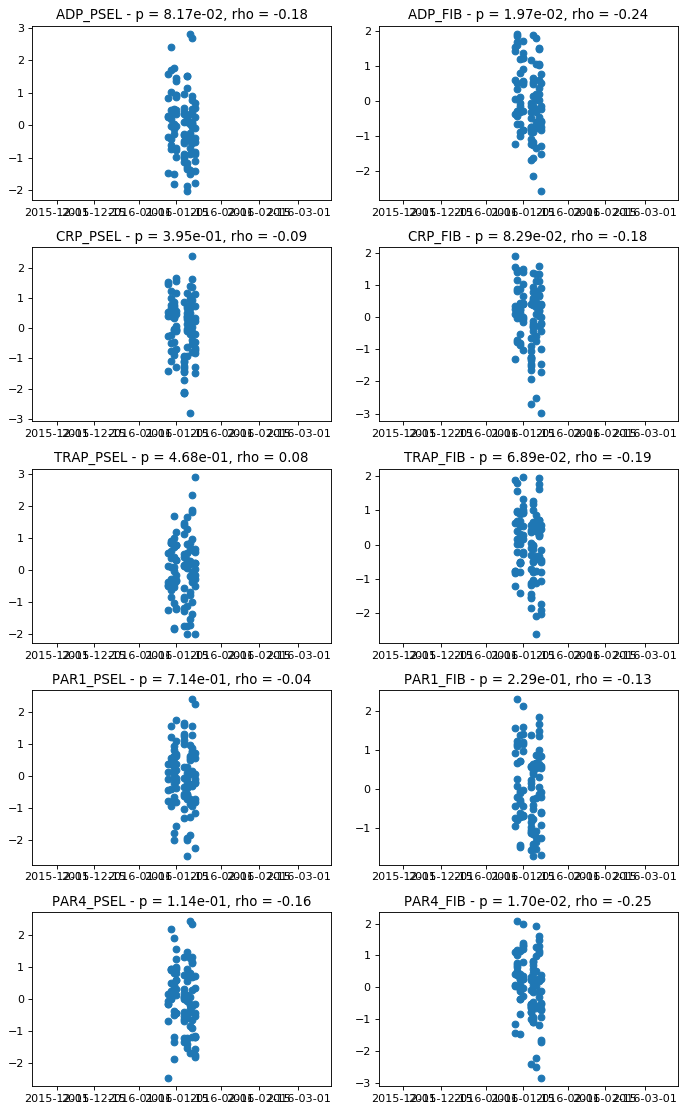

In [17]:
plt.figure(figsize=(13,14),dpi=80)
project = "PFC_4_U"
cond = df.PROJECT == project

for i, pheno in enumerate(pheno_columns):
    if "FIB" in pheno or "PSEL" in pheno:
        ax = plt.subplot(5,3,i+1)
        ax.scatter(df.loc[cond,"DATE"],df.loc[cond,pheno],label=project)
        ax.plot(df.loc[cond].groupby([pd.Grouper(key='DATE', freq='3M')])[pheno].mean(),color="red")
        cond_stat = cond & ~(df.DAYS.isnull() | df[pheno].isnull())
        stat = scipy.stats.pearsonr(df.loc[cond_stat,"DAYS"], df.loc[cond_stat,pheno])
        ax.set_title("%s - p = %.2e, rho = %.2f" % (pheno,stat[1],stat[0]))
    
plt.tight_layout()

ADP_PSEL
ADP_FIB
ADP
CRP_PSEL
CRP_FIB
CRP
TRAP_PSEL
TRAP_FIB
TRAP
PAR1_PSEL
PAR1_FIB
PAR1
PAR4_PSEL
PAR4_FIB
PAR4


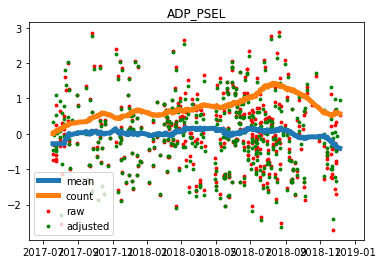

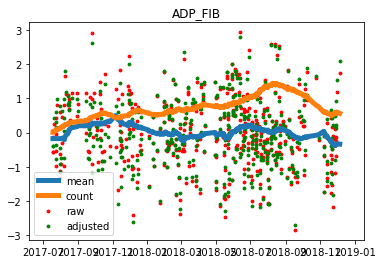

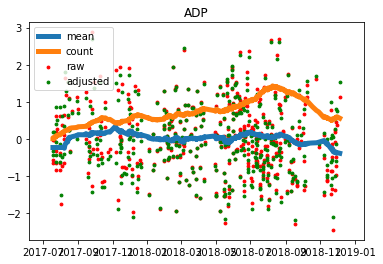

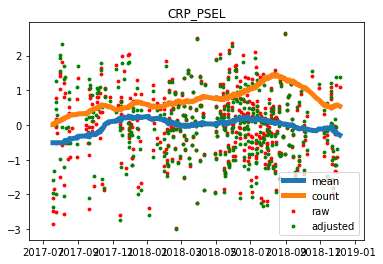

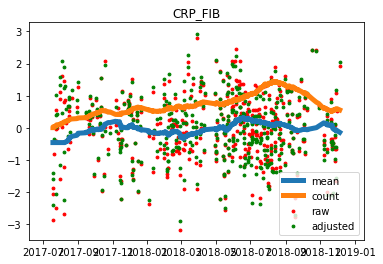

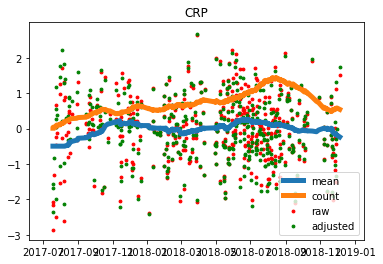

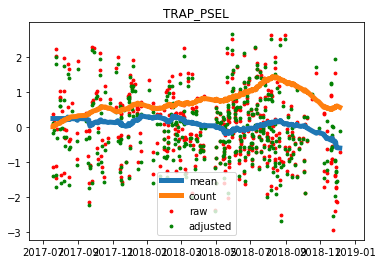

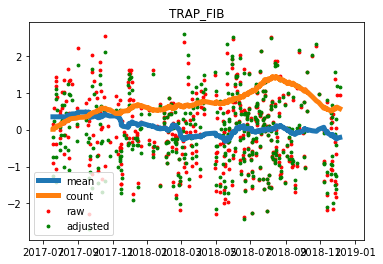

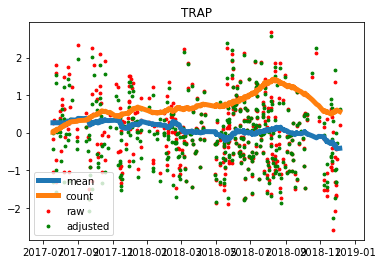

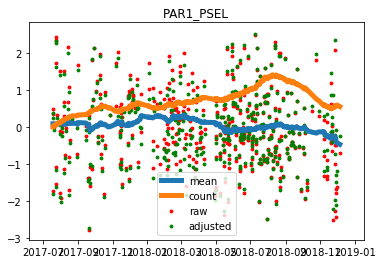

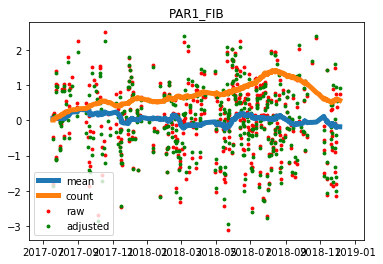

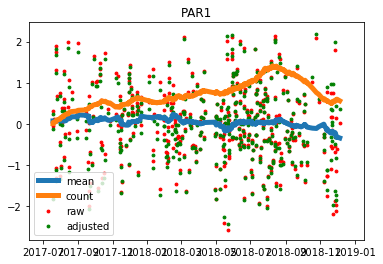

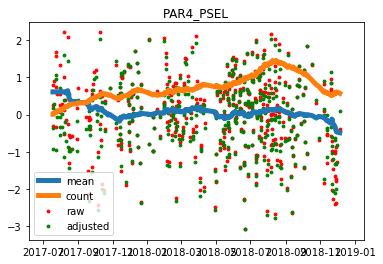

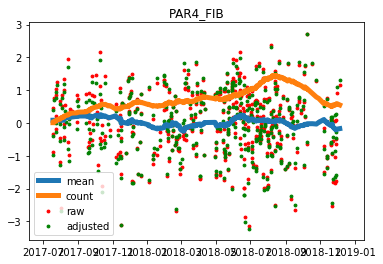

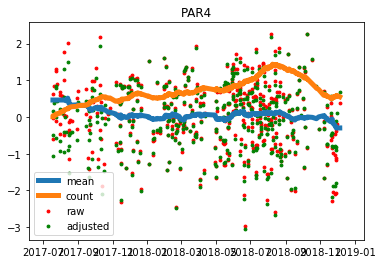

In [18]:
for p in pheno_columns:
    if p not in df.columns:
        continue
    print(p)
    # 45 days and min_count of 20 -> no improvement
    # SHould be improved, cluster points and apply adjustments on clusters.
    roll_count = df.loc[df.PROJECT == "PFC_4",[p,"DATE"]].rolling(window="90D",on="DATE").count()[p]
    roll_mean = df.loc[df.PROJECT == "PFC_4",[p,"DATE"]].rolling(window="90D",on="DATE").mean()[p]
    roll_mean.loc[roll_count < 20] = np.nan
    roll_mean = roll_mean.fillna(method="bfill")
    plt.figure()
    
    plt.scatter(df.loc[df.PROJECT == "PFC_4","DATE"],
                df.loc[df.PROJECT == "PFC_4",p],s=8,label="raw",c="red")
    plt.plot(df.loc[df.PROJECT == "PFC_4","DATE"],roll_mean,label="mean",lw=5)
    plt.plot(df.loc[df.PROJECT == "PFC_4","DATE"],roll_count/100,label="count",lw=5)
    
    df.loc[df.PROJECT == "PFC_4",p] -= roll_mean
    plt.scatter(df.loc[df.PROJECT == "PFC_4","DATE"],
                df.loc[df.PROJECT == "PFC_4",p],s=8,label="adjusted",c="green")
    plt.legend()
    plt.title(p)

## Summary of cohort sizes

In [19]:
for ago in agonists:
    for marker in ["FIB", "PSEL"]:
        print("%s - %s" % (ago, marker))
        print("Two replicates : \t\t%d" % df["OK_%s_%s" % (ago, marker)].sum())
        print("Coherent replicates : \t\t%d" % df["%s_%s_REP_OK" % (ago, marker)].sum())
        print("After outliers removal : \t%d" % df["%s_%s_VAL_OK" % (ago, marker)].sum())

df.loc[df.SAMPLE_ID.isin(sys_phen.ID.unique().tolist())].groupby("PROJECT")["SAMPLE_ID"].nunique()

ADP - FIB
Two replicates : 		2080
Coherent replicates : 		2044
After outliers removal : 	2031
ADP - PSEL
Two replicates : 		1635
Coherent replicates : 		1615
After outliers removal : 	1606
CRP - FIB
Two replicates : 		2084
Coherent replicates : 		2054
After outliers removal : 	2041
CRP - PSEL
Two replicates : 		2084
Coherent replicates : 		2064
After outliers removal : 	2052
TRAP - FIB
Two replicates : 		1136
Coherent replicates : 		1123
After outliers removal : 	1118
TRAP - PSEL
Two replicates : 		1136
Coherent replicates : 		1123
After outliers removal : 	1117
PAR1 - FIB
Two replicates : 		1134
Coherent replicates : 		1120
After outliers removal : 	1113
PAR1 - PSEL
Two replicates : 		1135
Coherent replicates : 		1119
After outliers removal : 	1112
PAR4 - FIB
Two replicates : 		1136
Coherent replicates : 		1128
After outliers removal : 	1120
PAR4 - PSEL
Two replicates : 		1135
Coherent replicates : 		1116
After outliers removal : 	1106


PROJECT
PFC_4      442
PFC_4_U     94
Name: SAMPLE_ID, dtype: int64

## Export phenotypes

In [20]:
pheno_df = df[["SAMPLE_ID"] + pheno_columns]
# TRAP AND PAR1 are very correlated, we create a phenotype with their average
pheno_df["TRAP_PAR1"] = 0.5*(pheno_df["TRAP"] + pheno_df["PAR1"])
pheno_df["TRAP_PAR1"] /= pheno_df["TRAP_PAR1"].std()
pheno_df["PSEL"] = pheno_df[[c for c in pheno_df.columns if "PSEL" in c]].mean(axis=1)
pheno_df["PSEL"] /= pheno_df.PSEL.std()
pheno_df["FIB"] = pheno_df[[c for c in pheno_df.columns if "FIB" in c]].mean(axis=1)
pheno_df["FIB"] /= pheno_df.FIB.std()

In [21]:
pheno_df.head()

,SAMPLE_ID,ADP_PSEL,ADP_FIB,ADP,CRP_PSEL,CRP_FIB,CRP,TRAP_PSEL,TRAP_FIB,TRAP,PAR1_PSEL,PAR1_FIB,PAR1,PAR4_PSEL,PAR4_FIB,PAR4,TRAP_PAR1,PSEL,FIB
0,100010100138,0.894928,0.331254,0.613091,0.005588,0.458084,0.231836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547899,0.470341
1,100010100139,0.446127,0.121018,0.283572,1.550080,1.678134,1.614107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214547,1.072056
2,100010100140,0.721840,0.416782,0.569311,0.475180,0.438540,0.456860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.728300,0.509659
3,100010100141,-1.345137,0.379559,-0.482789,0.651423,1.097282,0.874353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.422074,0.880002
4,100010100142,-0.872487,-1.989419,-1.430953,-0.031417,-0.560549,-0.295983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.549960,-1.519443


In [22]:
print("# of samples in total %d" % pheno_df.shape[0])
pheno_df = pheno_df.loc[pheno_df.SAMPLE_ID.isin(sys_phen.ID.unique().tolist())]
pheno_df.set_index("SAMPLE_ID",inplace=True)
print("# of samples in Sysmex WB dataset %d" % pheno_df.shape[0])

# of samples in total 2091
# of samples in Sysmex WB dataset 536


In [23]:
pheno_df.isnull().mean()

ADP_PSEL     0.011194
ADP_FIB      0.016791
ADP          0.020522
CRP_PSEL     0.014925
CRP_FIB      0.016791
CRP          0.024254
TRAP_PSEL    0.018657
TRAP_FIB     0.020522
TRAP         0.035448
PAR1_PSEL    0.020522
PAR1_FIB     0.022388
PAR1         0.029851
PAR4_PSEL    0.011194
PAR4_FIB     0.016791
PAR4         0.022388
TRAP_PAR1    0.059701
PSEL         0.000000
FIB          0.000000
dtype: float64

In [24]:
pheno_df.to_hdf("%s/pheno_df.hdf" % training_data,key="pheno_df")
df.to_hdf("%s/df_all_columns.hdf" % training_data,key="all_columns")

# Start building Sysmex features

## Adjust for time-dependance

In [25]:
sys_df = pd.read_hdf("%s/sys_df_init.hdf" % training_data)

In [26]:
sys_df.sample(1)

,Side Fluorescence Signal,Forward Scatter Signal,Side Scatter Signal,ID,exp
1471982,105.0,99.0,48.0,C19R8Y,wb


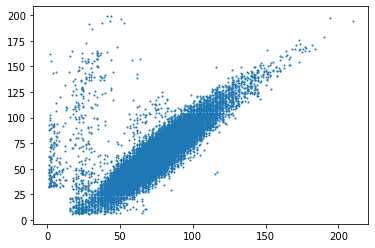

In [27]:
example = sys_df.loc[sys_df.ID ==  "C19MG1"]
plt.scatter(example["Side Fluorescence Signal"], example["Forward Scatter Signal"],s=1)

In [28]:
df = pd.read_hdf("%s/df_all_columns.hdf" % training_data)

In [29]:
signals = ["Side Fluorescence Signal",
                      "Forward Scatter Signal",
                      "Side Scatter Signal"]
sys_mean = sys_df.groupby("ID")[signals].mean()

In [30]:
sys_mean = pd.merge(sys_mean,df[["SAMPLE_ID","DAYS","DATE"]],left_index=True,right_on="SAMPLE_ID")

In [31]:
sys_mean.head(3)

,Side Fluorescence Signal,Forward Scatter Signal,Side Scatter Signal,SAMPLE_ID,DAYS,DATE
1555,76.548172,66.263527,46.370365,C0WX14,-554,2016-01-12
1556,77.092415,71.233322,48.285694,C0WX4Z,-554,2016-01-12
1557,78.262909,69.707817,48.392513,C0WX6V,-554,2016-01-12


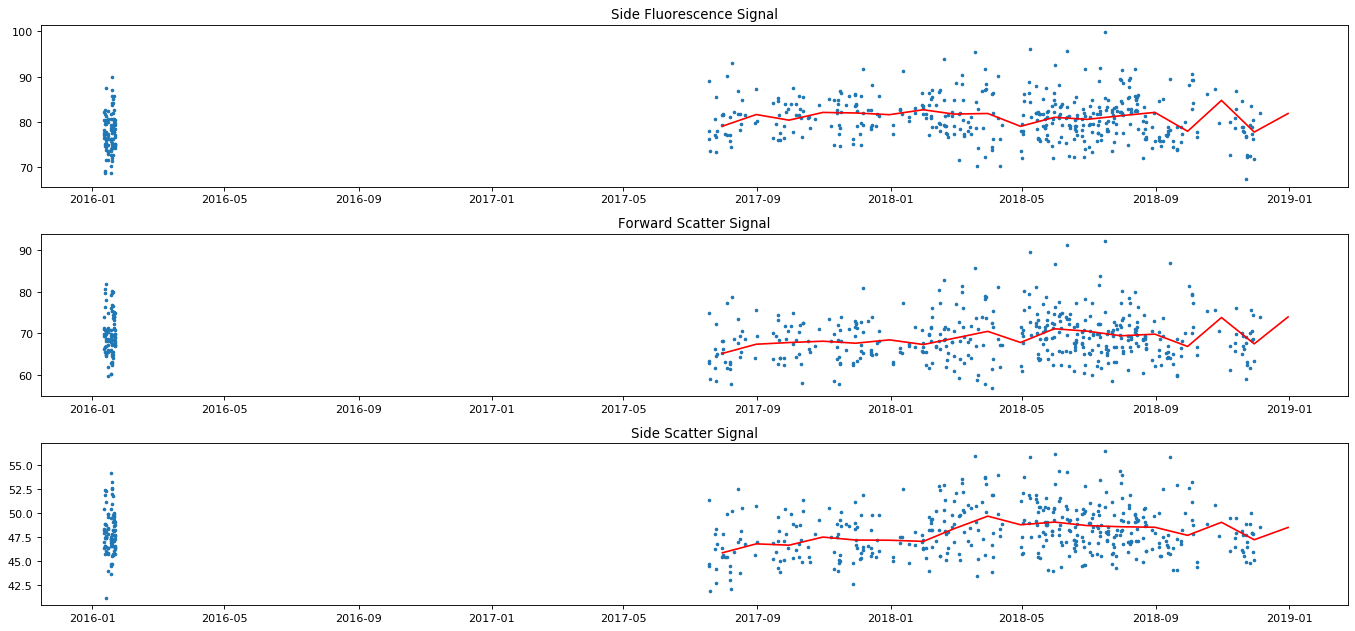

In [32]:
sys_mean["DATE"] = pd.to_datetime(sys_mean["DATE"],format="%Y-%m-%d")
plt.figure(figsize=(17,8),dpi=80)
for i,signal in enumerate(signals):
    ax = plt.subplot(3,1,i+1)
    ax.scatter(sys_mean["DATE"],sys_mean[signal],s=5)
    ax.plot(sys_mean.groupby([pd.Grouper(key='DATE', freq='1M')])[signal].mean(),color="red")
    ax.set_title(signal)
plt.tight_layout()

In [33]:
SFS_pre = sys_mean.loc[sys_mean["DATE"] < pd.to_datetime("2017-10-13",format="%Y-%m-%d"),"Side Fluorescence Signal"].mean()
SFS_post = sys_mean.loc[sys_mean["DATE"] >= pd.to_datetime("2017-10-13",format="%Y-%m-%d"),"Side Fluorescence Signal"].mean()

In [34]:
print("Before : %.2f" % SFS_pre)
print("After : %.2f" % SFS_post)

Before : 78.94
After : 81.12


In [35]:
IDs_pre = sys_mean.loc[sys_mean.DATE < pd.to_datetime("2017-10-13",format="%Y-%m-%d")].index.tolist()

In [36]:
sys_df.loc[sys_df.ID.isin(IDs_pre), "Side Fluorescence Signal"] += (SFS_post - SFS_pre)

In [37]:
sys_df.to_hdf("%s/sys_df_adjusted.hdf" % training_data,key="sys_df")

In [38]:
sys_df.groupby("ID")[signals].mean().mean()

Side Fluorescence Signal    80.379471
Forward Scatter Signal      69.384850
Side Scatter Signal         48.392696
dtype: float32

## Tag platelets

In [3]:
sys_df = pd.read_hdf("%s/sys_df_adjusted.hdf" % training_data,key="sys_df")
print("%d Sysmex IDs" % len(sys_df.ID.unique().tolist()))
sys_phen = pd.read_hdf("%s/sys_phen.hdf" % training_data, key="sys_phen")
pheno_df = pd.read_hdf("%s/pheno_df.hdf" % training_data, key="pheno_df")
df = pd.read_hdf("%s/df_all_columns.hdf" % training_data,key="all_columns")
signals = ["Side Fluorescence Signal",
                      "Forward Scatter Signal",
                      "Side Scatter Signal"]

533 Sysmex IDs


In [4]:
sys_df.groupby("ID")[signals].mean().mean()

Side Fluorescence Signal    80.499893
Forward Scatter Signal      69.174683
Side Scatter Signal         48.111790
dtype: float32

In [5]:
suspect_IDS = ["C19ET7","C0X075","C0X04B","C0X1HI"]

In [6]:
def extract_platelets(ID):
    return tag_platelets(sys_df.loc[sys_df.ID == ID], training_data)

In [7]:
plt_dfs = []
pool = Pool(12)
IDs = pheno_df.index.unique().tolist()
for plt_df in tqdm.tqdm(pool.imap_unordered(extract_platelets, IDs),total=len(IDs)):
    if plt_df is not None:
        plt_dfs.append(plt_df)
    else:
        print("___________ Returned None __________")
sys_df = pd.concat(plt_dfs,axis=0)

100%|██████████| 536/536 [03:01<00:00,  2.95it/s]


In [44]:
sys_df

,Side Fluorescence Signal,Forward Scatter Signal,Side Scatter Signal,ID,exp,PLT
17086147,85.0,91.0,53.0,C0WXJ5,wb,1
17086148,135.0,135.0,102.0,C0WXJ5,wb,1
17086149,77.0,69.0,52.0,C0WXJ5,wb,1
17086150,85.0,90.0,60.0,C0WXJ5,wb,1
17086151,66.0,62.0,43.0,C0WXJ5,wb,1
17086152,70.0,70.0,46.0,C0WXJ5,wb,1
17086153,126.0,122.0,79.0,C0WXJ5,wb,1
17086154,92.0,107.0,73.0,C0WXJ5,wb,1
17086155,67.0,67.0,49.0,C0WXJ5,wb,1
17086156,71.0,74.0,46.0,C0WXJ5,wb,1


In [8]:
sys_df.to_hdf("%s/sys_df_adjusted.hdf" % training_data,key="sys_df")

In [9]:
sys_phen.head()

,ID,exp,PLT_count,IPF,is_PLT_F,MPV,PDW,PCT,date
0,C1A2PI,wb,230,2.6,1,10.4,12.6,0.24,28112018
405,C196HQ,wb,357,3.0,1,10.5,12.4,0.36,09042018
427,C19C1Y,wb,277,1.5,1,9.7,10.7,0.26,25042018
428,C19BVF,wb,214,3.1,1,10.6,12.5,0.22,25042018
429,C19BTJ,wb,318,1.9,1,9.8,10.8,0.30,25042018


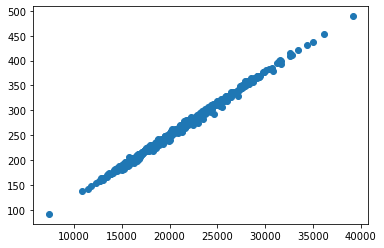

In [10]:
comp = pd.merge(sys_df.groupby("ID")["PLT"].sum(),sys_phen,left_index=True,right_on="ID",how="inner")
plt.scatter(comp["PLT"], comp["PLT_count"])

## Build features

In [11]:
sys_df = pd.read_hdf("%s/sys_df_adjusted.hdf" % training_data)
sys_phen = pd.read_hdf("%s/sys_phen.hdf" % training_data,key="sys_phen")
wb_ids = sys_df.ID.unique().tolist()

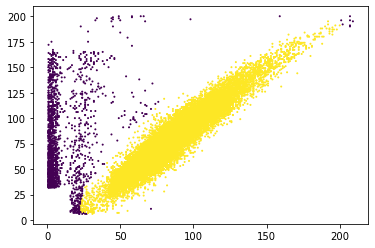

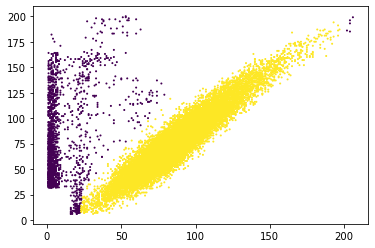

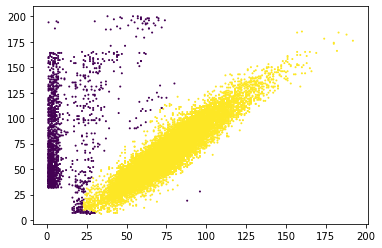

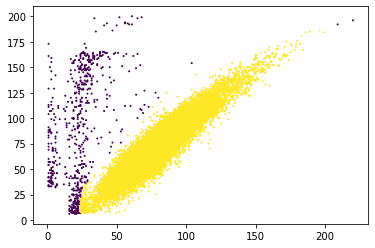

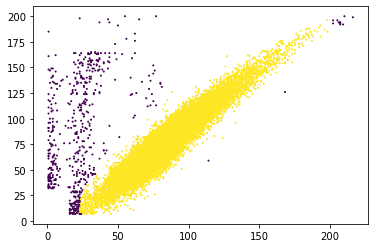

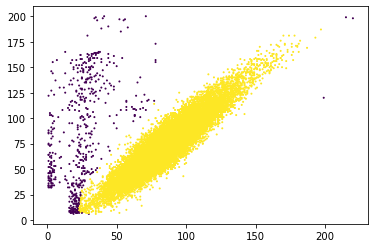

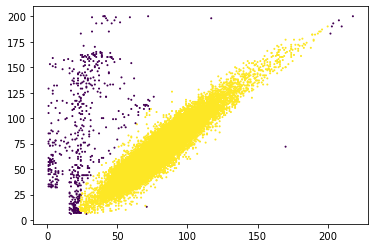

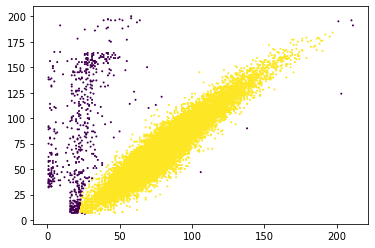

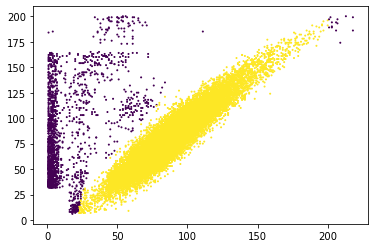

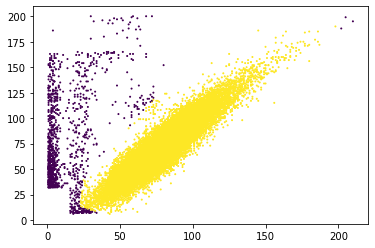

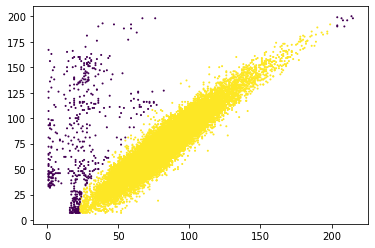

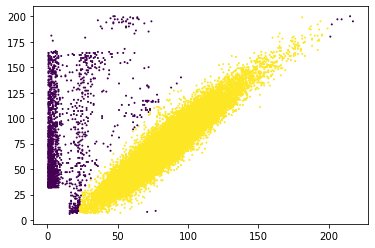

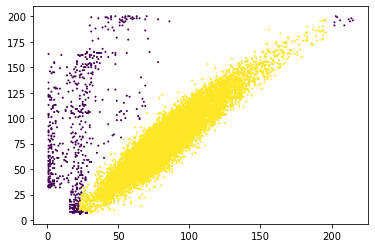

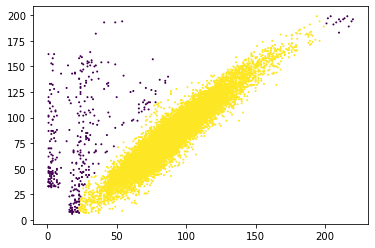

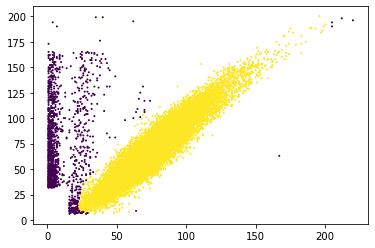

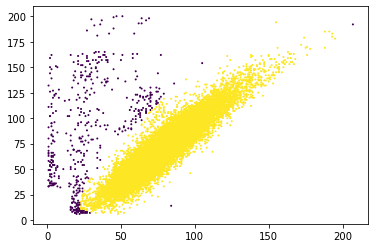

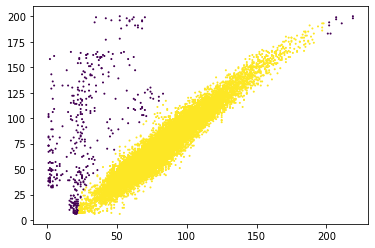

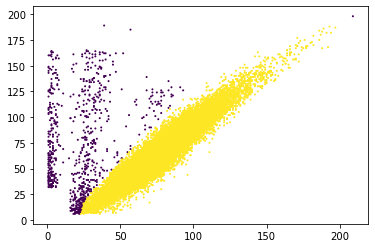

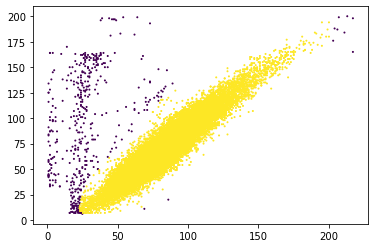

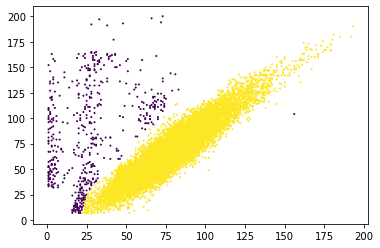

In [6]:
for ID in wb_ids[:20]:
    plt.figure()
    plt.scatter(sys_df.loc[sys_df.ID == ID,"Side Fluorescence Signal"],
                sys_df.loc[sys_df.ID == ID,"Forward Scatter Signal"],
                c = sys_df.loc[sys_df.ID == ID, "PLT"],s=1.
               )

Features from each experiment
Fitting PCA wb
Saving PCA of wb
Side Fluorescence Signal   -0.014611
Forward Scatter Signal     -0.017734
Side Scatter Signal        -0.018498
dtype: float64
Side Fluorescence Signal    0.991705
Forward Scatter Signal      0.995021
Side Scatter Signal         0.996844
dtype: float64
10.352877138413685
258.4059097978227
12.001866251944012
0.26097978227060653


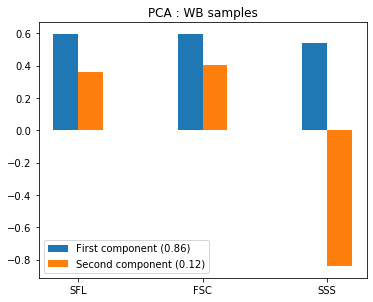

In [12]:
hor_steps = 6
vert_steps = 6
features, X = build_features(sys_df.copy(),
                                    sys_phen.copy(),
                                    wb_ids,
                                    hor_steps, vert_steps,
                                    plot=True,
                                    save_pca=True,
                                    out_folder=training_data
                                    )

In [13]:
features.to_hdf("%s/features.hdf" % training_data,key="features")

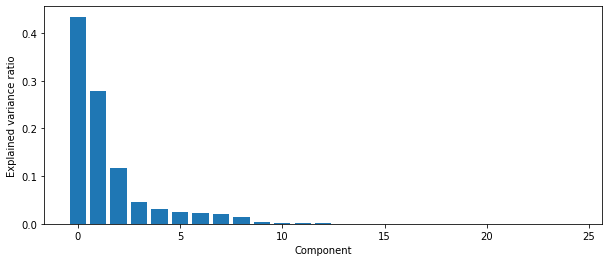

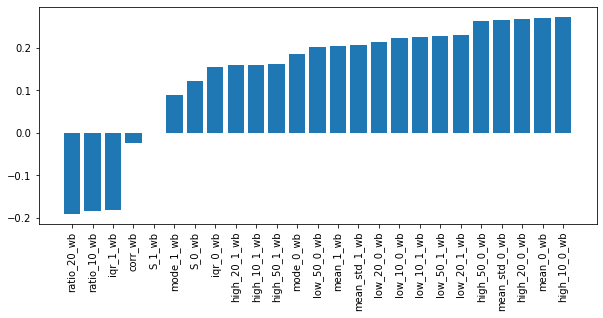

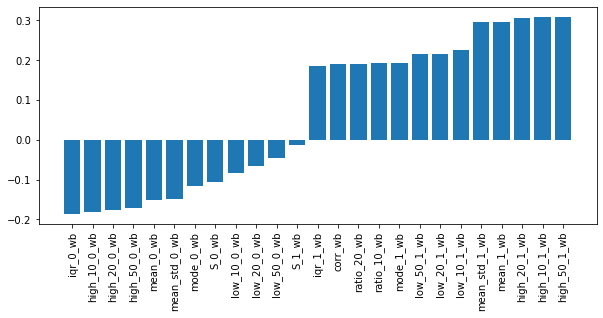

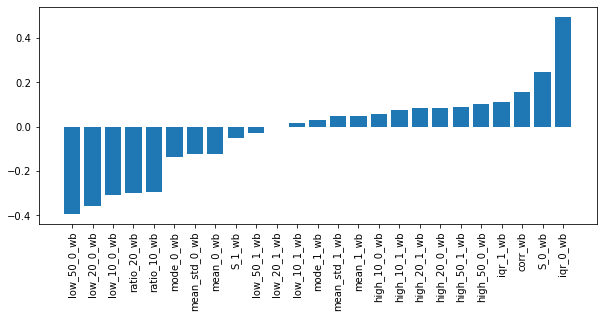

In [14]:
pca = PCA().fit(features.iloc[:,:-4])
fig = plt.figure(figsize=(10,4))
e_var = pca.explained_variance_ratio_
plt.bar(np.arange(len(e_var)),e_var)
plt.xlabel("Component")
plt.ylabel("Explained variance ratio")
n_significant_comps = np.max(np.where(e_var > 0.05)[0])
for k in range(n_significant_comps +1):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    order = np.argsort(pca.components_[k])
    ax.bar(np.arange(len(e_var)),pca.components_[k,order])
    plt.xticks(np.arange(len(e_var)),features.columns[order],rotation='vertical')

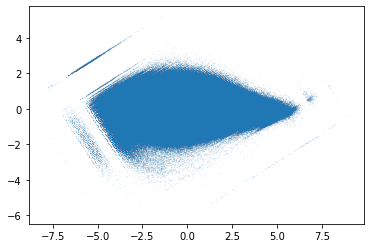

In [15]:
# New with low-cut
plt.scatter(X[0],X[1],s=0.001)

In [16]:
X[[0,1]].mean()

0   -0.031806
1   -0.001838
dtype: float64

['wb']
Spotted 0 samples from wb


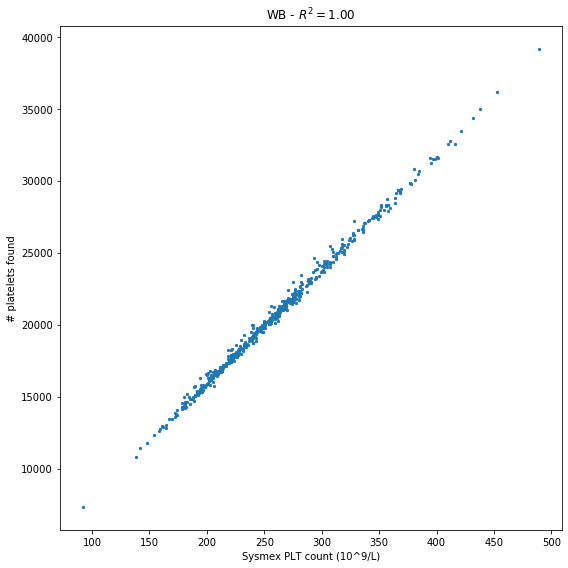

In [17]:
filter_with_count(sys_df,sys_phen)

if there are samples to exclude based on this, put them in this list :

In [20]:
to_exclude = []

In [21]:
wb_ids = [ID for ID in wb_ids if ID not in to_exclude]

In [54]:
features

,high_10_0_wb,high_10_1_wb,high_20_0_wb,high_20_1_wb,high_50_0_wb,high_50_1_wb,low_10_0_wb,low_10_1_wb,low_20_0_wb,low_20_1_wb,...,mode_1_wb,S_0_wb,S_1_wb,iqr_0_wb,iqr_1_wb,corr_wb,MPV_wb,PCT_wb,PDW_wb,PLT_wb
ID,,,,,,,,,,,,,,,,,,,,,
C0WX14,-0.686843,-0.198892,-0.538926,-0.236797,-0.457341,-0.384817,-0.193862,0.178466,-0.076263,0.315432,...,0.344114,-0.836046,-0.116156,-0.883015,-1.110967,0.711747,-0.909091,-0.285714,-0.863636,0.352113
C0WX4Z,-0.148104,-0.203896,-0.099420,-0.130810,-0.048128,-0.159092,0.109126,-0.460584,0.088725,-0.711626,...,0.058000,-0.014896,-0.340157,-0.270243,0.530546,-0.656175,-0.090909,-0.142857,0.045455,0.042254
C0WX6V,0.154204,-0.514284,0.334391,-0.540395,0.497798,-0.507894,-0.388431,-0.355426,-0.559348,-0.591991,...,-0.735405,0.825908,-0.532551,0.424131,-0.732953,-0.769575,-0.181818,0.142857,-0.227273,0.352113
C0WX7T,0.278854,-0.717779,0.226055,-0.655781,0.061908,-0.729051,0.705937,-0.722436,0.692699,-0.673476,...,-0.531794,0.217639,-0.043403,-0.092938,-0.040866,-0.330572,0.727273,0.428571,0.909091,0.239437
C0WX8R,0.386761,0.441599,0.605897,0.445543,0.730089,0.320513,0.021699,0.910398,0.020295,0.866878,...,1.513435,0.905176,-0.667805,0.566016,-1.398824,0.407877,0.545455,0.285714,0.545455,0.126761
C0WXBL,-0.273142,-0.198969,-0.158433,-0.146417,-0.030522,-0.158748,-0.238669,0.101981,-0.184436,0.097533,...,-0.334491,-0.044880,-1.391162,-0.159309,-1.123920,-0.233904,-0.181818,1.428571,0.227273,1.577465
C0WXDH,-0.485515,0.062277,-0.524529,0.068704,-0.583999,0.107812,-0.193916,0.306244,-0.102683,0.328759,...,-0.098694,-0.715841,-1.038571,-0.288529,-0.387557,-0.178397,-0.181818,1.285714,0.045455,1.309859
C0WXFD,-0.643700,-0.724243,-0.530010,-0.679431,-0.497383,-0.740219,-0.756171,-0.506701,-0.800159,-0.518183,...,-0.128941,-2.349051,-2.166574,-0.338047,-0.536496,-0.206113,-0.636364,-1.000000,-0.772727,-0.830986
C0WXGB,-0.420489,-0.658231,-0.371594,-0.775105,-0.311527,-0.716545,-0.943125,-0.970699,-1.032455,-1.076696,...,-0.882502,-0.021975,0.586578,0.138551,0.322132,-1.063495,-0.636364,-0.714286,-0.500000,-0.197183


# Clustering according to phenotypes ?

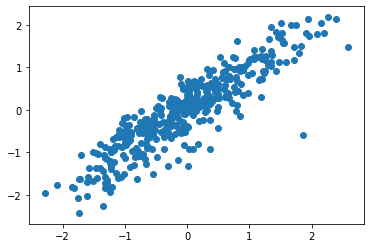

In [63]:
plt.figure()
plt.scatter(pheno_df["TRAP"], pheno_df["PAR1"])

392


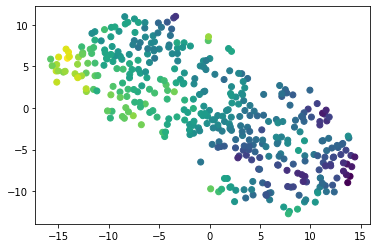

In [64]:
ts = TSNE(perplexity=50)
df_all_filled = pheno_df[["ADP","CRP","TRAP_PAR1","PAR4"]].copy()
df_all_filled.dropna(axis=0,how="any",inplace=True)
print(df_all_filled.shape[0])
ts.fit(df_all_filled)
plt.figure()
plt.scatter(ts.embedding_[:,0], ts.embedding_[:,1],c=df_all_filled["TRAP_PAR1"])

# Training

In [18]:
features = pd.read_hdf("%s/features.hdf" % training_data, key="features")
sys_phen = pd.read_hdf("%s/sys_phen.hdf" % training_data, key="sys_phen")
pheno_df = pd.read_hdf("%s/pheno_df.hdf" % training_data, key="pheno_df")

In [19]:
X_info = pd.merge(features, sys_phen, right_on="ID", left_index=True,how="inner").set_index("ID")

In [20]:
X_info.shape
X_info.sample(3)

,high_10_0_wb,high_10_1_wb,high_20_0_wb,high_20_1_wb,high_50_0_wb,high_50_1_wb,low_10_0_wb,low_10_1_wb,low_20_0_wb,low_20_1_wb,...,PDW_wb,PLT_wb,exp,PLT_count,IPF,is_PLT_F,MPV,PDW,PCT,date
ID,,,,,,,,,,,,,,,,,,,,,
C19V2U,0.567986,0.352534,0.555004,0.215093,0.500127,0.037730,0.473410,0.670159,0.469911,0.706372,...,0.272727,-0.028169,wb,254,5.3,1,10.6,12.3,0.28,13082018
C19YVY,-0.223436,1.536773,-0.111317,1.602976,-0.102156,1.611554,-0.785848,0.765435,-0.811951,0.553189,...,0.454545,-0.704225,wb,206,3.4,1,10.5,12.7,0.22,09102018
C0WYUG,-0.799781,0.138728,-0.701213,0.228458,-0.622671,0.230159,-1.276715,0.055689,-1.292737,-0.119059,...,-0.727273,0.042254,wb,259,2.0,1,9.4,10.1,0.21,19012016


In [21]:
sys_cols = ["PLT_wb", "MPV_wb", "PDW_wb", "PCT_wb"]
agg_cols = [f for f in features.columns if "KDE" not in f and "wb" in f]
agg_cols = [f for f in agg_cols if "PLT" not in f]
agg_cols = [f for f in agg_cols if "MPV" not in f]
agg_cols = [f for f in agg_cols if "PCT" not in f]
agg_cols = [f for f in agg_cols if "PDW" not in f]
prediction_results = pd.DataFrame(index=pheno_df.columns)
prediction_results["Overall"] = 0.
prediction_results["pearson"] = 0.
if not os.path.exists("%s/predictors/" % training_data):
    os.mkdir("%s/predictors/" % training_data)
prediction_all = pd.DataFrame(index=pheno_df.index)

In [22]:
from tqdm import tqdm

In [23]:
n_iter = 50
R2_scores = np.zeros((n_iter,pheno_df.shape[1],4))
np.random.seed(0)
phenos = [c for c in pheno_df.columns.tolist() if "FIB" in c]

pred_KDE = {}
pred_agg = {}

predictions = pd.DataFrame(index=X_info.index)

for i, pheno in enumerate(phenos):
    
    iter_ = 0
        
    skf = RepeatedStratifiedKFold(n_splits=2,n_repeats=n_iter // 2)
    X_info_Y = pd.merge(X_info,pheno_df[[pheno]],left_index=True,right_index=True,how="inner").copy()
    X_info_Y.dropna(axis=0,how="any", inplace=True)
    
    y = pd.cut(X_info_Y[pheno],n_iter,labels=False)
    
    for train_index, test_index in skf.split(np.zeros(len(y)), y):
            
        train_test = pheno_df.index[train_index]
        val = pheno_df.index[test_index]
        
        sub_train_test = [ID for ID in train_test if ID in X_info_Y.index.tolist()]
        sub_val = [ID for ID in val if ID in X_info_Y.index.tolist()]

        #X_KDE = X_info_Y[KDE_cols]
        X_agg = X_info_Y[agg_cols]
        #X_agg -= X_agg.loc[sub_train_test].mean(axis=0)
        #X_agg /= X_agg.loc[sub_train_test].std(axis=0)
        sys = X_info_Y[sys_cols]
        Y = X_info_Y[pheno]

        print("Training for %s on %d samples" % (pheno,len(sub_train_test)))
        pred_agg[pheno] = agg_features_predictor(pheno,"BIC")
        pred_agg[pheno].select_best_params(X_agg.loc[sub_train_test],
                                           Y.loc[sub_train_test],
                                           sys.loc[sub_train_test])

        prediction = pd.DataFrame(index=Y.index)
        # We first fill predictions for the train_test subset, by predicting in 10-fold splits.
        prediction.loc[sub_train_test,"agg"] = pred_agg[pheno].predict_in_splits_with_best(X_agg.loc[sub_train_test],
                                                                                           Y.loc[sub_train_test],
                                                                                           sys.loc[sub_train_test])
        # We then train on the whole train_test subset
        pred_agg[pheno].train_on_best_params(X_agg.loc[sub_train_test],
                                             Y.loc[sub_train_test],
                                             sys.loc[sub_train_test])

        # And fill predictions for the val subset
        prediction.loc[sub_val,"agg"] = pred_agg[pheno].predict_with_best(X_agg.loc[sub_val],
                                                                          sys.loc[sub_val])
        prediction.loc[sub_val,"sysmex"] = pred_agg[pheno].predict_with_best(X_agg.loc[sub_val],
                                                                             sys.loc[sub_val],
                                                                             return_sysmex=True)
        
        # We keep a record of predictions.
        predictions.loc[sub_val, "%s_%s" % (pheno,"agg")] = prediction.loc[sub_val,"agg"]
        predictions.loc[sub_val, "%s_%s" % (pheno,"sys")] = prediction.loc[sub_val,"sysmex"]

        #R2_val_KDE = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"KDE"])
        R2_val_agg = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"agg"])
        #R2_val_mean = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"mean"])
        R2_val_sysmex = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"sysmex"])
        #R2_scores[iter_,i,0] = R2_val_KDE
        R2_scores[iter_,i,1] = R2_val_agg
        #R2_scores[iter_,i,2] = R2_val_mean
        R2_scores[iter_,i,3] = R2_val_sysmex

        print("On Validation set")
        #print("R^2 = %.2f (KDE)" % R2_val_KDE)
        print("R^2 = %.2f (agg)" % R2_val_agg)
        #print("R^2 = %.2f (mean)" % R2_val_mean)
        print("\n")
        
        '''
        fig = plt.figure(dpi=100,figsize=(11,6))

        ax = fig.add_subplot(131)
        ax.scatter(Y,prediction["KDE"],c=Y.index.isin(sub_val))
        ax.set_title("KDE %s - R^2 = %.2f" % (pheno,R2_val_KDE))

        ax = fig.add_subplot(132)
        ax.scatter(Y,prediction["agg"],c=Y.index.isin(sub_val))
        ax.set_title("Agg %s - R^2 = %.2f" % (pheno,R2_val_agg))
        
        ax = fig.add_subplot(133)
        ax.scatter(Y,prediction["mean"],c=Y.index.isin(sub_val))
        ax.set_title("Mean %s - R^2 = %.2f" % (pheno,R2_val_agg))

        plt.tight_layout()
        plt.savefig("%s/%s_no_adjust_y.png" % (training_data,pheno))
        '''
        
        iter_ += 1

5it [00:00, 85.25it/s]

Training for ADP_FIB on 250 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 86.13it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 263 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.18 on residuals
n_comps_pca = 1 



5it [00:00, 85.15it/s]

On Validation set
R^2 = 0.16 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 83.51it/s]

On Validation set
R^2 = 0.23 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 84.10it/s]

On Validation set
R^2 = 0.11 (agg)


Training for ADP_FIB on 251 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 84.69it/s]

On Validation set
R^2 = 0.27 (agg)


Training for ADP_FIB on 262 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 86.59it/s]

On Validation set
R^2 = 0.05 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 85.26it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 86.10it/s]

On Validation set
R^2 = 0.17 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 83.54it/s]

On Validation set
R^2 = 0.23 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.14 on residuals
n_comps_pca = 1 



5it [00:00, 86.71it/s]

On Validation set
R^2 = 0.16 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 86.38it/s]

On Validation set
R^2 = 0.20 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 87.59it/s]

On Validation set
R^2 = 0.18 (agg)


Training for ADP_FIB on 250 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 86.92it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 263 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 87.23it/s]

On Validation set
R^2 = 0.15 (agg)


Training for ADP_FIB on 247 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.20 on residuals
n_comps_pca = 1 



5it [00:00, 87.30it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 266 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.11 on residuals
n_comps_pca = 1 



5it [00:00, 88.59it/s]

On Validation set
R^2 = 0.15 (agg)


Training for ADP_FIB on 251 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.14 on residuals
n_comps_pca = 1 



5it [00:00, 87.43it/s]

On Validation set
R^2 = 0.18 (agg)


Training for ADP_FIB on 262 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 87.66it/s]

On Validation set
R^2 = 0.20 (agg)


Training for ADP_FIB on 251 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 87.20it/s]

On Validation set
R^2 = 0.18 (agg)


Training for ADP_FIB on 262 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 87.06it/s]

On Validation set
R^2 = 0.20 (agg)


Training for ADP_FIB on 251 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 83.65it/s]

On Validation set
R^2 = 0.21 (agg)


Training for ADP_FIB on 262 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 86.39it/s]

On Validation set
R^2 = 0.21 (agg)


Training for ADP_FIB on 248 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.20 on residuals
n_comps_pca = 1 



5it [00:00, 85.92it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 265 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.11 on residuals
n_comps_pca = 1 



5it [00:00, 87.15it/s]

On Validation set
R^2 = 0.17 (agg)


Training for ADP_FIB on 252 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 87.73it/s]

On Validation set
R^2 = 0.23 (agg)


Training for ADP_FIB on 261 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 87.08it/s]

On Validation set
R^2 = 0.16 (agg)


Training for ADP_FIB on 248 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 86.35it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 265 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.14 on residuals
n_comps_pca = 1 



5it [00:00, 87.85it/s]

On Validation set
R^2 = 0.14 (agg)


Training for ADP_FIB on 250 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.15 on residuals
n_comps_pca = 1 



5it [00:00, 87.36it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 263 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.15 on residuals
n_comps_pca = 1 



5it [00:00, 88.09it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 248 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.13 on residuals
n_comps_pca = 1 



5it [00:00, 86.92it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 265 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 87.65it/s]

On Validation set
R^2 = 0.20 (agg)


Training for ADP_FIB on 250 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 86.93it/s]

On Validation set
R^2 = 0.18 (agg)


Training for ADP_FIB on 263 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.11 on residuals
n_comps_pca = 1 



5it [00:00, 87.17it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 87.17it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 87.47it/s]

On Validation set
R^2 = 0.15 (agg)


Training for ADP_FIB on 247 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 87.36it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 266 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.15 on residuals
n_comps_pca = 1 



5it [00:00, 86.91it/s]

On Validation set
R^2 = 0.16 (agg)


Training for ADP_FIB on 246 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.14 on residuals
n_comps_pca = 1 



5it [00:00, 84.64it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 267 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 86.32it/s]

On Validation set
R^2 = 0.18 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 86.01it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.20 on residuals
n_comps_pca = 1 



5it [00:00, 85.71it/s]

On Validation set
R^2 = 0.06 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 85.75it/s]

On Validation set
R^2 = 0.22 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.17 on residuals
n_comps_pca = 1 



5it [00:00, 86.05it/s]

On Validation set
R^2 = 0.19 (agg)


Training for ADP_FIB on 249 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.18 on residuals
n_comps_pca = 1 



5it [00:00, 85.77it/s]

On Validation set
R^2 = 0.13 (agg)


Training for ADP_FIB on 264 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 85.62it/s]

On Validation set
R^2 = 0.26 (agg)


Training for ADP_FIB on 251 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.15 on residuals
n_comps_pca = 1 



5it [00:00, 85.31it/s]

On Validation set
R^2 = 0.16 (agg)


Training for ADP_FIB on 262 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.14 on residuals
n_comps_pca = 1 



5it [00:00, 85.68it/s]

On Validation set
R^2 = 0.25 (agg)


Training for ADP_FIB on 252 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 86.01it/s]

On Validation set
R^2 = 0.21 (agg)


Training for ADP_FIB on 261 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.18 on residuals
n_comps_pca = 1 



5it [00:00, 86.93it/s]

On Validation set
R^2 = 0.19 (agg)


Training for CRP_FIB on 247 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.26it/s]

On Validation set
R^2 = 0.01 (agg)


Training for CRP_FIB on 267 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.80it/s]

On Validation set
R^2 = 0.07 (agg)


Training for CRP_FIB on 250 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.23it/s]

On Validation set
R^2 = 0.00 (agg)


Training for CRP_FIB on 264 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.39it/s]

On Validation set
R^2 = 0.02 (agg)


Training for CRP_FIB on 250 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 85.27it/s]

On Validation set
R^2 = 0.04 (agg)


Training for CRP_FIB on 264 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.45it/s]

On Validation set
R^2 = 0.05 (agg)


Training for CRP_FIB on 245 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.61it/s]

On Validation set
R^2 = 0.07 (agg)


Training for CRP_FIB on 269 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 88.26it/s]

On Validation set
R^2 = 0.05 (agg)


Training for CRP_FIB on 246 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 88.70it/s]

On Validation set
R^2 = 0.01 (agg)


Training for CRP_FIB on 268 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.10 on residuals
n_comps_pca = 1 



5it [00:00, 87.35it/s]

On Validation set
R^2 = -0.07 (agg)


Training for CRP_FIB on 246 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.61it/s]

On Validation set
R^2 = 0.00 (agg)


Training for CRP_FIB on 268 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.58it/s]

On Validation set
R^2 = 0.06 (agg)


Training for CRP_FIB on 247 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.48it/s]

On Validation set
R^2 = 0.07 (agg)


Training for CRP_FIB on 267 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 89.08it/s]

On Validation set
R^2 = 0.02 (agg)


Training for CRP_FIB on 249 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.86it/s]

On Validation set
R^2 = 0.08 (agg)


Training for CRP_FIB on 265 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.71it/s]

On Validation set
R^2 = -0.02 (agg)


Training for CRP_FIB on 248 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.56it/s]

On Validation set
R^2 = 0.03 (agg)


Training for CRP_FIB on 266 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.78it/s]

On Validation set
R^2 = -0.01 (agg)


Training for CRP_FIB on 244 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.07it/s]

On Validation set
R^2 = 0.08 (agg)


Training for CRP_FIB on 270 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 88.52it/s]

On Validation set
R^2 = 0.01 (agg)


Training for CRP_FIB on 247 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.32it/s]

On Validation set
R^2 = 0.07 (agg)


Training for CRP_FIB on 267 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 85.54it/s]

On Validation set
R^2 = 0.03 (agg)


Training for CRP_FIB on 246 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.85it/s]

On Validation set
R^2 = 0.06 (agg)


Training for CRP_FIB on 268 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.90it/s]

On Validation set
R^2 = 0.03 (agg)


Training for CRP_FIB on 247 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 86.24it/s]

On Validation set
R^2 = 0.03 (agg)


Training for CRP_FIB on 267 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.10it/s]

On Validation set
R^2 = 0.04 (agg)


Training for CRP_FIB on 247 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.10 on residuals
n_comps_pca = 1 



5it [00:00, 88.57it/s]

On Validation set
R^2 = 0.01 (agg)


Training for CRP_FIB on 267 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.84it/s]

On Validation set
R^2 = 0.08 (agg)


Training for CRP_FIB on 249 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.83it/s]

On Validation set
R^2 = 0.08 (agg)


Training for CRP_FIB on 265 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 89.04it/s]

On Validation set
R^2 = 0.01 (agg)


Training for CRP_FIB on 247 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.07it/s]

On Validation set
R^2 = 0.06 (agg)


Training for CRP_FIB on 267 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.33it/s]

On Validation set
R^2 = 0.03 (agg)


Training for CRP_FIB on 248 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.69it/s]

On Validation set
R^2 = 0.06 (agg)


Training for CRP_FIB on 266 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.95it/s]

On Validation set
R^2 = 0.08 (agg)


Training for CRP_FIB on 248 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.47it/s]

On Validation set
R^2 = 0.06 (agg)


Training for CRP_FIB on 266 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 88.03it/s]

On Validation set
R^2 = 0.04 (agg)


Training for CRP_FIB on 246 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.23it/s]

On Validation set
R^2 = 0.03 (agg)


Training for CRP_FIB on 268 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.55it/s]

On Validation set
R^2 = -0.01 (agg)


Training for CRP_FIB on 248 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 84.96it/s]

On Validation set
R^2 = 0.05 (agg)


Training for CRP_FIB on 266 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 85.37it/s]

On Validation set
R^2 = 0.07 (agg)


Training for CRP_FIB on 245 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 84.41it/s]

On Validation set
R^2 = 0.00 (agg)


Training for CRP_FIB on 269 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.45it/s]

On Validation set
R^2 = 0.05 (agg)


Training for CRP_FIB on 250 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.21it/s]

On Validation set
R^2 = 0.05 (agg)


Training for CRP_FIB on 264 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.84it/s]

On Validation set
R^2 = 0.06 (agg)


Training for CRP_FIB on 248 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 84.93it/s]

On Validation set
R^2 = 0.08 (agg)


Training for CRP_FIB on 266 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 88.41it/s]

On Validation set
R^2 = 0.01 (agg)


Training for CRP_FIB on 247 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.94it/s]

On Validation set
R^2 = 0.03 (agg)


Training for CRP_FIB on 267 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 88.15it/s]

On Validation set
R^2 = 0.01 (agg)


Training for CRP_FIB on 246 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 86.69it/s]

On Validation set
R^2 = 0.04 (agg)


Training for CRP_FIB on 268 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.51it/s]

On Validation set
R^2 = 0.05 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 87.48it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 88.45it/s]

On Validation set
R^2 = 0.04 (agg)


Training for TRAP_FIB on 243 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 82.95it/s]

On Validation set
R^2 = -0.07 (agg)


Training for TRAP_FIB on 266 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 89.70it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.89it/s]

On Validation set
R^2 = -0.05 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 84.67it/s]

On Validation set
R^2 = 0.06 (agg)


Training for TRAP_FIB on 243 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.33it/s]

On Validation set
R^2 = -0.05 (agg)


Training for TRAP_FIB on 266 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.02 on residuals
n_comps_pca = 1 



5it [00:00, 86.56it/s]

On Validation set
R^2 = 0.06 (agg)


Training for TRAP_FIB on 241 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.52it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 268 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 88.95it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.69it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.35it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 247 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.69it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 262 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.16it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 243 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.75it/s]

On Validation set
R^2 = -0.07 (agg)


Training for TRAP_FIB on 266 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.80it/s]

On Validation set
R^2 = -0.00 (agg)


Training for TRAP_FIB on 242 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 86.28it/s]

On Validation set
R^2 = -0.02 (agg)


Training for TRAP_FIB on 267 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.02 on residuals
n_comps_pca = 1 



5it [00:00, 87.01it/s]

On Validation set
R^2 = 0.06 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.02 on residuals
n_comps_pca = 1 



5it [00:00, 86.09it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 86.16it/s]

On Validation set
R^2 = -0.03 (agg)


Training for TRAP_FIB on 244 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.81it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 265 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.86it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 85.11it/s]

On Validation set
R^2 = -0.06 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 85.93it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 246 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 84.50it/s]

On Validation set
R^2 = 0.04 (agg)


Training for TRAP_FIB on 263 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.35it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 244 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 84.30it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 265 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.07it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 244 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 85.16it/s]

On Validation set
R^2 = 0.02 (agg)


Training for TRAP_FIB on 265 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 85.53it/s]

On Validation set
R^2 = -0.02 (agg)


Training for TRAP_FIB on 240 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 85.66it/s]

On Validation set
R^2 = -0.04 (agg)


Training for TRAP_FIB on 269 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 84.95it/s]

On Validation set
R^2 = 0.02 (agg)


Training for TRAP_FIB on 242 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 84.32it/s]

On Validation set
R^2 = 0.02 (agg)


Training for TRAP_FIB on 267 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 86.07it/s]

On Validation set
R^2 = 0.06 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 85.31it/s]

On Validation set
R^2 = -0.00 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 86.46it/s]

On Validation set
R^2 = 0.07 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.51it/s]

On Validation set
R^2 = -0.00 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 88.45it/s]

On Validation set
R^2 = 0.04 (agg)


Training for TRAP_FIB on 244 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.70it/s]

On Validation set
R^2 = 0.02 (agg)


Training for TRAP_FIB on 265 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 85.71it/s]

On Validation set
R^2 = 0.00 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 85.87it/s]

On Validation set
R^2 = 0.03 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.22it/s]

On Validation set
R^2 = 0.00 (agg)


Training for TRAP_FIB on 239 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.24it/s]

On Validation set
R^2 = -0.01 (agg)


Training for TRAP_FIB on 270 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.25it/s]

On Validation set
R^2 = -0.03 (agg)


Training for TRAP_FIB on 243 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.12it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 266 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.55it/s]

On Validation set
R^2 = 0.01 (agg)


Training for TRAP_FIB on 246 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.93it/s]

On Validation set
R^2 = -0.02 (agg)


Training for TRAP_FIB on 263 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.33it/s]

On Validation set
R^2 = 0.02 (agg)


Training for TRAP_FIB on 245 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 86.29it/s]

On Validation set
R^2 = 0.02 (agg)


Training for TRAP_FIB on 264 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.63it/s]

On Validation set
R^2 = 0.01 (agg)


Training for PAR1_FIB on 241 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.72it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR1_FIB on 266 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.40it/s]

On Validation set
R^2 = -0.01 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.90it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.60it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR1_FIB on 243 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.26it/s]

On Validation set
R^2 = -0.02 (agg)


Training for PAR1_FIB on 264 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.35it/s]

On Validation set
R^2 = -0.02 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.58it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.64it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 239 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.40it/s]

On Validation set
R^2 = 0.08 (agg)


Training for PAR1_FIB on 268 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 88.01it/s]

On Validation set
R^2 = 0.00 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.27it/s]

On Validation set
R^2 = 0.05 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 85.98it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.15it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.10 on residuals
n_comps_pca = 1 



5it [00:00, 87.27it/s]

On Validation set
R^2 = -0.05 (agg)


Training for PAR1_FIB on 242 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.95it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR1_FIB on 265 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.25it/s]

On Validation set
R^2 = -0.02 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.24it/s]

On Validation set
R^2 = 0.01 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 85.81it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 247 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 85.51it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR1_FIB on 260 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.14it/s]

On Validation set
R^2 = 0.08 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.96it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.21it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 245 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 86.46it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 262 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.93it/s]

On Validation set
R^2 = -0.02 (agg)


Training for PAR1_FIB on 242 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 83.73it/s]

On Validation set
R^2 = -0.06 (agg)


Training for PAR1_FIB on 265 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 84.69it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR1_FIB on 246 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 85.48it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR1_FIB on 261 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.57it/s]

On Validation set
R^2 = -0.01 (agg)


Training for PAR1_FIB on 242 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.40it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 265 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 85.79it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR1_FIB on 245 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.94it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR1_FIB on 262 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 89.68it/s]

On Validation set
R^2 = 0.05 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 88.40it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.66it/s]

On Validation set
R^2 = 0.00 (agg)


Training for PAR1_FIB on 242 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 89.07it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR1_FIB on 265 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 88.24it/s]

On Validation set
R^2 = -0.01 (agg)


Training for PAR1_FIB on 247 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 88.66it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 260 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 90.01it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR1_FIB on 242 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.47it/s]

On Validation set
R^2 = -0.02 (agg)


Training for PAR1_FIB on 265 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 88.49it/s]

On Validation set
R^2 = 0.08 (agg)


Training for PAR1_FIB on 240 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.28it/s]

On Validation set
R^2 = 0.08 (agg)


Training for PAR1_FIB on 267 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.19it/s]

On Validation set
R^2 = 0.05 (agg)


Training for PAR1_FIB on 243 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 88.91it/s]

On Validation set
R^2 = 0.05 (agg)


Training for PAR1_FIB on 264 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 88.43it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.03it/s]

On Validation set
R^2 = -0.01 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.97it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR1_FIB on 244 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.46it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR1_FIB on 263 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.71it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR1_FIB on 247 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 88.15it/s]

On Validation set
R^2 = 0.08 (agg)


Training for PAR1_FIB on 260 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.23it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR4_FIB on 251 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.70it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR4_FIB on 263 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.50it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR4_FIB on 249 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 88.67it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 265 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.75it/s]

On Validation set
R^2 = -0.01 (agg)


Training for PAR4_FIB on 253 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 86.57it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR4_FIB on 261 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 86.05it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 252 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 85.45it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 262 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.74it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 252 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 86.38it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 262 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.02it/s]

On Validation set
R^2 = 0.10 (agg)


Training for PAR4_FIB on 250 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 85.13it/s]

On Validation set
R^2 = 0.10 (agg)


Training for PAR4_FIB on 264 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.26it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR4_FIB on 247 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 85.11it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR4_FIB on 267 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 87.62it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 250 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 85.23it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR4_FIB on 264 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.64it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 247 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 85.48it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR4_FIB on 267 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.25it/s]

On Validation set
R^2 = 0.11 (agg)


Training for PAR4_FIB on 251 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 86.61it/s]

On Validation set
R^2 = 0.08 (agg)


Training for PAR4_FIB on 263 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.20it/s]

On Validation set
R^2 = -0.07 (agg)


Training for PAR4_FIB on 251 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 85.50it/s]

On Validation set
R^2 = 0.10 (agg)


Training for PAR4_FIB on 263 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 88.08it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR4_FIB on 247 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.20it/s]

On Validation set
R^2 = 0.02 (agg)


Training for PAR4_FIB on 267 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 88.62it/s]

On Validation set
R^2 = 0.11 (agg)


Training for PAR4_FIB on 252 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.25it/s]

On Validation set
R^2 = -0.00 (agg)


Training for PAR4_FIB on 262 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 88.00it/s]

On Validation set
R^2 = 0.09 (agg)


Training for PAR4_FIB on 250 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 82.41it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR4_FIB on 264 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.60it/s]

On Validation set
R^2 = 0.09 (agg)


Training for PAR4_FIB on 247 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.32it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR4_FIB on 267 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 89.53it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR4_FIB on 247 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.22it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR4_FIB on 267 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.80it/s]

On Validation set
R^2 = 0.12 (agg)


Training for PAR4_FIB on 249 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.16it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR4_FIB on 265 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 89.04it/s]

On Validation set
R^2 = 0.01 (agg)


Training for PAR4_FIB on 250 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 87.23it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 264 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.15it/s]

On Validation set
R^2 = 0.07 (agg)


Training for PAR4_FIB on 247 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 88.81it/s]

On Validation set
R^2 = 0.11 (agg)


Training for PAR4_FIB on 267 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 89.49it/s]

On Validation set
R^2 = 0.08 (agg)


Training for PAR4_FIB on 251 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.88it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR4_FIB on 263 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 89.08it/s]

On Validation set
R^2 = 0.10 (agg)


Training for PAR4_FIB on 253 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.53it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR4_FIB on 261 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.87it/s]

On Validation set
R^2 = 0.09 (agg)


Training for PAR4_FIB on 248 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.06it/s]

On Validation set
R^2 = 0.06 (agg)


Training for PAR4_FIB on 266 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.29it/s]

On Validation set
R^2 = 0.09 (agg)


Training for PAR4_FIB on 251 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 86.84it/s]

On Validation set
R^2 = 0.03 (agg)


Training for PAR4_FIB on 263 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 88.11it/s]

On Validation set
R^2 = 0.11 (agg)


Training for PAR4_FIB on 251 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.59it/s]

On Validation set
R^2 = 0.11 (agg)


Training for PAR4_FIB on 263 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.45it/s]

On Validation set
R^2 = 0.04 (agg)


Training for PAR4_FIB on 250 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 85.08it/s]

On Validation set
R^2 = 0.11 (agg)


Training for PAR4_FIB on 264 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.11it/s]

On Validation set
R^2 = 0.05 (agg)


Training for FIB on 254 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.10 on residuals
n_comps_pca = 1 



5it [00:00, 86.17it/s]

On Validation set
R^2 = 0.08 (agg)


Training for FIB on 276 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.00it/s]

On Validation set
R^2 = 0.14 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 86.45it/s]

On Validation set
R^2 = 0.10 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 86.92it/s]

On Validation set
R^2 = 0.03 (agg)


Training for FIB on 257 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.11 on residuals
n_comps_pca = 1 



5it [00:00, 87.19it/s]

On Validation set
R^2 = -0.00 (agg)


Training for FIB on 273 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.28it/s]

On Validation set
R^2 = 0.10 (agg)


Training for FIB on 256 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 85.07it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 274 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.61it/s]

On Validation set
R^2 = 0.11 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 84.87it/s]

On Validation set
R^2 = 0.04 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 87.87it/s]

On Validation set
R^2 = 0.17 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.10 on residuals
n_comps_pca = 1 



5it [00:00, 83.81it/s]

On Validation set
R^2 = 0.09 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.79it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 254 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.28it/s]

On Validation set
R^2 = 0.13 (agg)


Training for FIB on 276 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.67it/s]

On Validation set
R^2 = 0.11 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 84.51it/s]

On Validation set
R^2 = 0.09 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 89.17it/s]

On Validation set
R^2 = 0.08 (agg)


Training for FIB on 256 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.29it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 274 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 88.12it/s]

On Validation set
R^2 = 0.09 (agg)


Training for FIB on 257 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.93it/s]

On Validation set
R^2 = 0.06 (agg)


Training for FIB on 273 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 89.01it/s]

On Validation set
R^2 = 0.10 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 87.44it/s]

On Validation set
R^2 = 0.08 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.79it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 254 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 88.43it/s]

On Validation set
R^2 = 0.16 (agg)


Training for FIB on 276 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.16 on residuals
n_comps_pca = 1 



5it [00:00, 89.56it/s]

On Validation set
R^2 = -0.00 (agg)


Training for FIB on 253 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 88.08it/s]

On Validation set
R^2 = 0.10 (agg)


Training for FIB on 277 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 85.82it/s]

On Validation set
R^2 = 0.09 (agg)


Training for FIB on 253 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 88.69it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 277 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.11 on residuals
n_comps_pca = 1 



5it [00:00, 88.04it/s]

On Validation set
R^2 = 0.10 (agg)


Training for FIB on 256 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 



5it [00:00, 87.75it/s]

On Validation set
R^2 = 0.14 (agg)


Training for FIB on 274 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 88.14it/s]

On Validation set
R^2 = 0.09 (agg)


Training for FIB on 254 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 88.61it/s]

On Validation set
R^2 = 0.08 (agg)


Training for FIB on 276 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.07 on residuals
n_comps_pca = 1 



5it [00:00, 88.05it/s]

On Validation set
R^2 = 0.13 (agg)


Training for FIB on 256 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 87.08it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 274 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.11 on residuals
n_comps_pca = 1 



5it [00:00, 87.32it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 86.56it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 



5it [00:00, 87.20it/s]

On Validation set
R^2 = 0.02 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 86.22it/s]

On Validation set
R^2 = 0.11 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.17it/s]

On Validation set
R^2 = 0.06 (agg)


Training for FIB on 253 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.15 on residuals
n_comps_pca = 1 



5it [00:00, 87.55it/s]

On Validation set
R^2 = 0.06 (agg)


Training for FIB on 277 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 86.50it/s]

On Validation set
R^2 = 0.11 (agg)


Training for FIB on 254 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.18 on residuals
n_comps_pca = 1 



5it [00:00, 85.07it/s]

On Validation set
R^2 = 0.00 (agg)


Training for FIB on 276 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 



5it [00:00, 86.40it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 254 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 85.90it/s]

On Validation set
R^2 = 0.11 (agg)


Training for FIB on 276 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.09 on residuals
n_comps_pca = 1 



5it [00:00, 87.62it/s]

On Validation set
R^2 = 0.13 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.03 on residuals
n_comps_pca = 1 



5it [00:00, 85.41it/s]

On Validation set
R^2 = 0.13 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.15 on residuals
n_comps_pca = 1 



5it [00:00, 85.99it/s]

On Validation set
R^2 = -0.02 (agg)


Training for FIB on 256 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.12 on residuals
n_comps_pca = 1 



5it [00:00, 85.08it/s]

On Validation set
R^2 = 0.10 (agg)


Training for FIB on 274 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 



5it [00:00, 85.31it/s]

On Validation set
R^2 = 0.15 (agg)


Training for FIB on 255 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.11 on residuals
n_comps_pca = 1 



5it [00:00, 85.04it/s]

On Validation set
R^2 = 0.12 (agg)


Training for FIB on 275 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 


On Validation set
R^2 = 0.09 (agg)




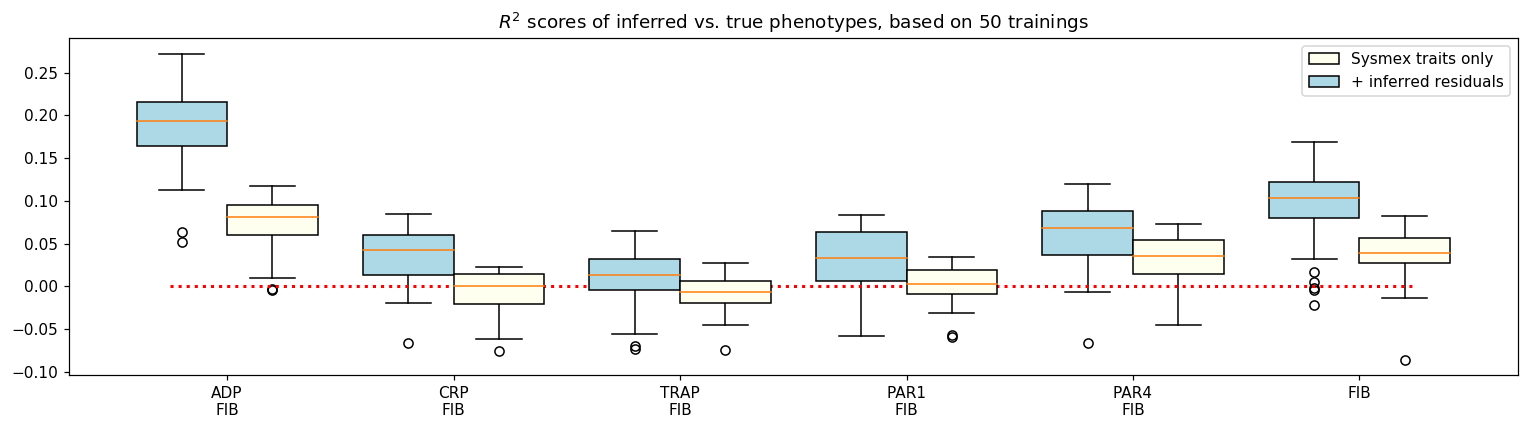

In [24]:
fig = plt.figure(figsize=(14,4),dpi=110)
ax = fig.add_subplot()
# Aggregated features
ax.boxplot([R2_scores[:,p,1] for p in range(len(phenos))],
           positions=np.arange(len(phenos))-.2,
           widths=0.4,
           patch_artist=True,
           meanprops={"color":"red"},
           boxprops={"facecolor":"lightblue"})
# Sysmex
ax.boxplot([R2_scores[:,p,3] for p in range(len(phenos))],
           positions=np.arange(len(phenos))+.2,
           widths=0.4,
           patch_artist=True,
           meanprops={"color":"red"},
           boxprops={"facecolor":"ivory"})
ax.plot([-0.25,len(phenos) - 0.75],[0,0],ls=":",color="red",lw=2)
ax.set_xticks(np.arange(len(phenos)))
ax.set_xticklabels(["\n".join(p.split("_")) for p in phenos])
ax.set_title("$R^2$ scores of inferred vs. true phenotypes, based on %d trainings" % R2_scores.shape[0])

legend_elements = [Patch(facecolor='ivory',
                         label='Sysmex traits only',
                         edgecolor='black'),
                   Patch(facecolor='lightblue',
                         edgecolor='black',
                         label='+ inferred residuals')]

ax.legend(handles=legend_elements)
plt.tight_layout()

## interprétation des prédicteurs, par phénotype.

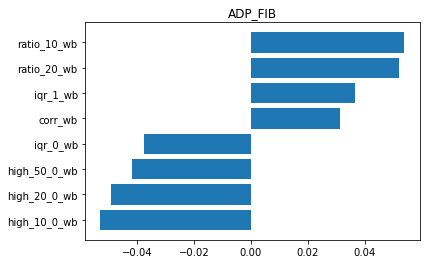

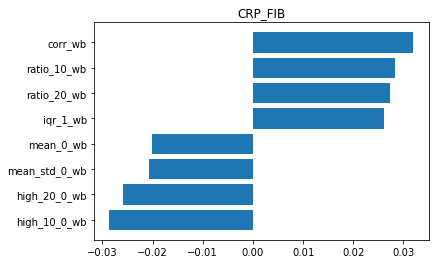

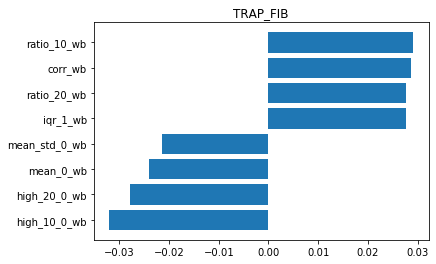

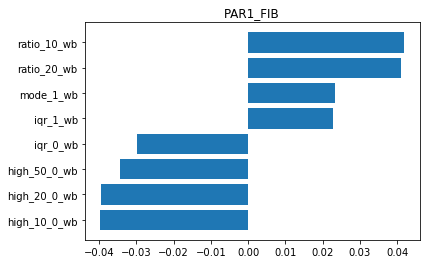

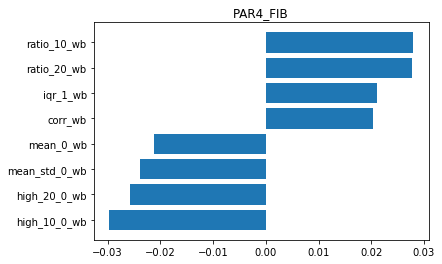

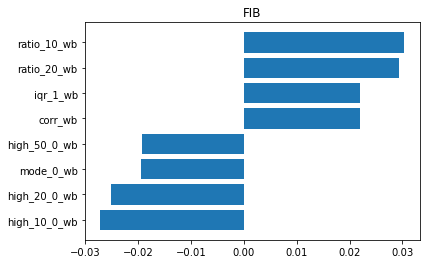

In [25]:
for p in phenos:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    coef = pred_agg[p].lm.coef_[:,0]
    order = np.argsort(coef)
    top = list(order[:4]) + list(order[-4:])
    ax.barh(np.arange(len(top)),coef[top])
    ax.set_yticks(np.arange(len(top)))
    ax.set_yticklabels(features.columns[top].tolist())
    ax.set_title(p)

## Look at errors

In [64]:
predictions.isnull().mean(axis=0)

ADP_FIB_agg     0.037523
ADP_FIB_sys     0.037523
CRP_FIB_agg     0.035647
CRP_FIB_sys     0.035647
TRAP_FIB_agg    0.045028
TRAP_FIB_sys    0.045028
PAR1_FIB_agg    0.048780
PAR1_FIB_sys    0.048780
PAR4_FIB_agg    0.035647
PAR4_FIB_sys    0.035647
FIB_agg         0.005629
FIB_sys         0.005629
dtype: float64

In [65]:
errors = pd.DataFrame(index=pheno_df.index)
for p in phenos:
    errors[p] = (predictions[p+"_agg"] - pheno_df[p])**2
errors["TOTAL"] = errors.mean(axis=1)

In [66]:
errors.sort_values(by="TOTAL",ascending=False)

,ADP_FIB,CRP_FIB,TRAP_FIB,PAR1_FIB,PAR4_FIB,FIB,TOTAL
SAMPLE_ID,,,,,,,
C0X1Q0,4.623557,7.092720,NaN,NaN,6.552823,8.879095,6.787049
C18QGU,NaN,6.041381,2.956536,6.104907,8.916259,7.088130,6.221443
C194E3,3.146168,6.772899,5.556694,6.659458,4.354223,6.861864,5.558551
C19NC5,3.724383,1.865754,7.678101,4.627391,5.816134,6.937503,5.108211
C19EV3,7.805842,5.922887,1.716842,2.540616,4.540174,6.970638,4.916166
C19V0Y,2.622975,3.792148,1.636564,2.084966,13.323928,5.124999,4.764263
C19SN0,5.029000,3.727043,2.538627,6.232942,3.864364,5.658588,4.508427
C18GKP,1.373652,NaN,7.984894,5.191339,1.286960,4.538407,4.075051
C18MYA,2.240187,4.138922,5.498412,4.738244,1.777681,5.398351,3.965300


In [67]:
errors.mean(axis=0)

ADP_FIB     0.791000
CRP_FIB     0.938061
TRAP_FIB    0.943212
PAR1_FIB    0.917421
PAR4_FIB    0.900398
FIB         0.918715
TOTAL       0.916565
dtype: float64

In [68]:
err_comp = pd.merge(errors,df[["SAMPLE_ID","DATE","PROJECT"]],left_index=True,right_on="SAMPLE_ID",how="inner")

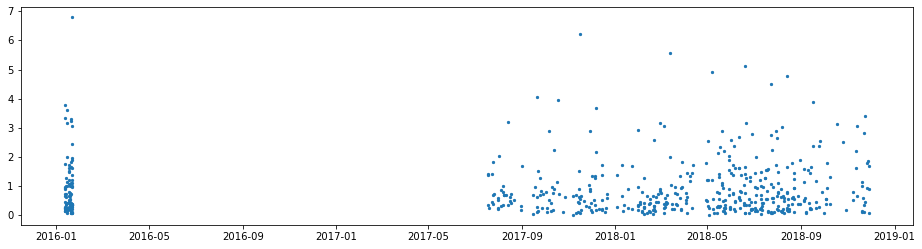

In [69]:
plt.figure(figsize=(16,4))
plt.scatter(err_comp.DATE,err_comp.TOTAL,s=5)

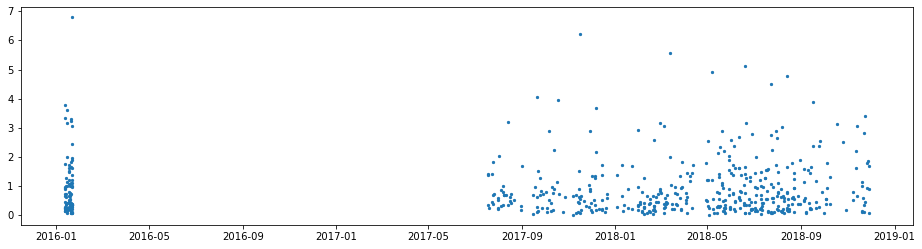

In [70]:
plt.figure(figsize=(16,4))
plt.scatter(err_comp.DATE,err_comp.TOTAL,s=5)

In [326]:
all_pheno_df = pd.read_csv("%s/metadata_PF/PLATELET_FUNCTION_KD_11062019.txt" % data_dir,sep="\t")
all_pheno_df.DATE = pd.to_datetime(all_pheno_df.DATE,format="%d/%m/%y")
pfc2_dates = pd.read_excel("%s/metadata_PF/EE2 Study_Platelet Function_KD_early file.xlsx" % data_dir)
pfc2_dates.SampleID = pfc2_dates.SampleID.astype(str)
pfc2_dates.set_index("SampleID",inplace=True)
del pfc2_dates["Time"]
all_pheno_df = pd.merge(pfc2_dates,all_pheno_df,left_index=True,right_on="SAMPLE_ID",how="right")
all_pheno_df.loc[~all_pheno_df.Date.isnull(),"DATE"] = all_pheno_df.loc[~all_pheno_df.Date.isnull(),"Date"]
del all_pheno_df["Date"]
#all_pheno_df.loc[all_pheno_df.PROJECT == "PFC_4_U","PROJECT"] = "PFC_4"

In [327]:
all_pheno_df.head()

,PROJECT,SAMPLE_ID,DATE,TIME,REST_FIB_1,REST_FIB_2,REST_PSEL_1,REST_PSEL_2,ADP_FIB_1,ADP_FIB_2,...,PAR1_PSEL_1,PAR1_PSEL_2,PAR4_FIB_1,PAR4_FIB_2,PAR4_PSEL_1,PAR4_PSEL_2,TRAP_FIB_1,TRAP_FIB_2,TRAP_PSEL_1,TRAP_PSEL_2
0,PFC_1,100010100138,2005-01-08,07:56:00,2.22,2.91,NaN,NaN,30.74,28.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PFC_1,100010100139,2005-01-08,08:16:00,3.22,2.84,NaN,NaN,27.77,25.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PFC_1,100010100140,2005-01-08,08:39:00,3.52,3.28,NaN,NaN,32.35,28.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PFC_1,100010100141,2005-01-08,08:44:00,2.19,2.93,NaN,NaN,27.31,33.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PFC_1,100010100142,2005-01-08,08:52:00,3.60,3.68,NaN,NaN,7.52,8.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
all_pheno_df.shape

(2142, 28)

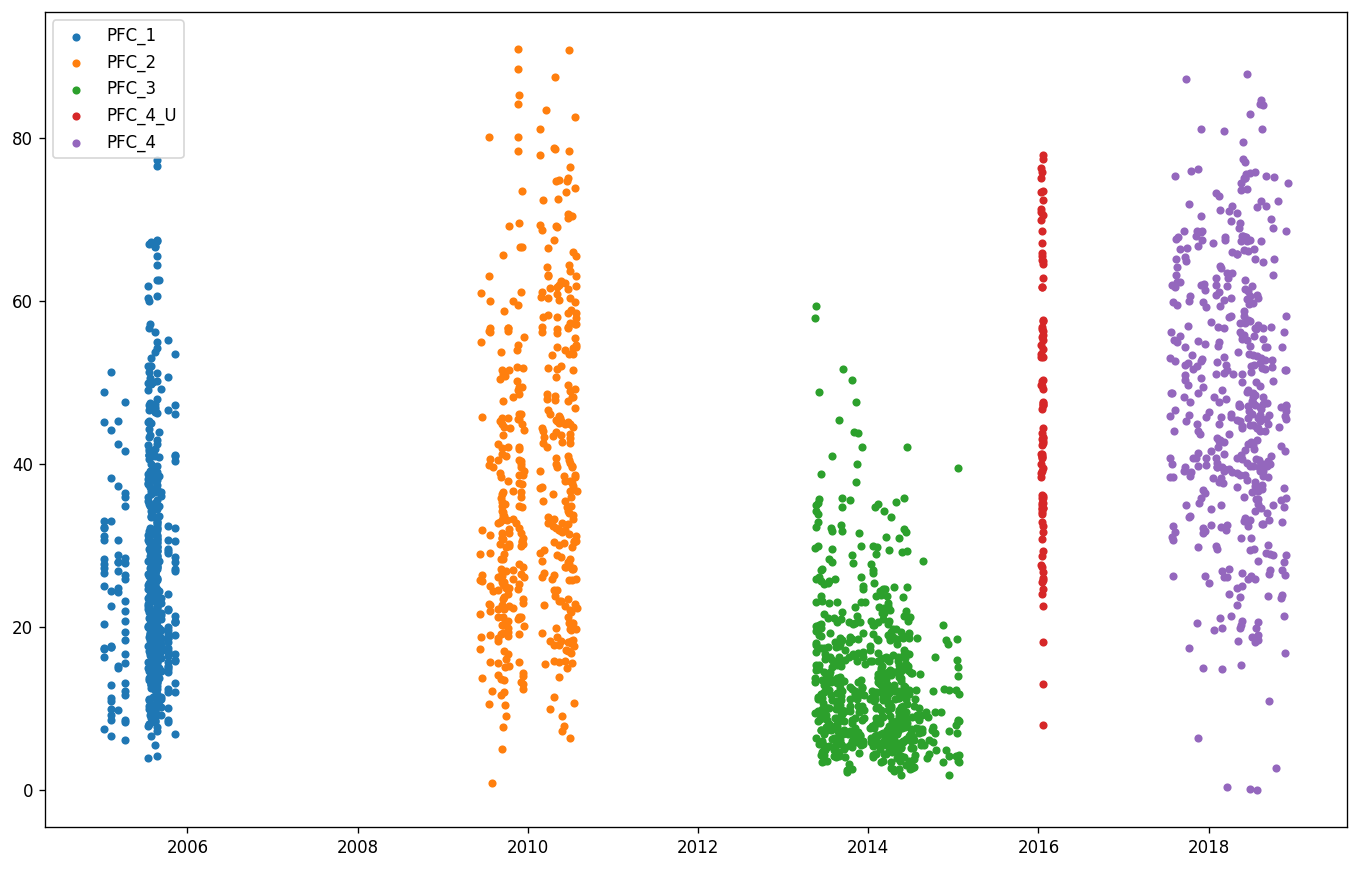

In [329]:
plt.figure(figsize=(14,9),dpi=120)
for project in all_pheno_df.PROJECT.unique():
    cond = all_pheno_df.PROJECT == project
    plt.scatter(all_pheno_df.loc[cond,"DATE"],all_pheno_df.loc[cond,"ADP_FIB_1"],label=project,s=15)
plt.legend()

In [13]:
all_pheno_df.loc[all_pheno_df.PROJECT == "PFC_2"].sample(10)

,PROJECT,SAMPLE_ID,DATE,TIME,REST_FIB_1,REST_FIB_2,REST_PSEL_1,REST_PSEL_2,ADP_FIB_1,ADP_FIB_2,...,PAR1_PSEL_1,PAR1_PSEL_2,PAR4_FIB_1,PAR4_FIB_2,PAR4_PSEL_1,PAR4_PSEL_2,TRAP_FIB_1,TRAP_FIB_2,TRAP_PSEL_1,TRAP_PSEL_2
854,PFC_2,1417,2010-06-25,10:41:42,6.46,5.35,8.85,10.43,53.47,67.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,PFC_2,722,2009-09-22,13:42:41,2.24,1.11,3.52,2.65,12.09,11.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,PFC_2,522,2010-07-05,08:08:35,2.91,1.51,8.51,9.62,24.52,36.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,PFC_2,787,2009-11-19,08:22:50,26.21,8.90,6.32,6.96,84.17,82.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,PFC_2,1294,2010-07-13,11:15:52,3.74,5.63,12.34,11.92,53.50,59.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,PFC_2,875,2010-05-21,08:37:10,2.25,2.60,7.10,6.53,28.58,34.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,PFC_2,1447,2010-09-07,11:56:41,4.87,4.03,8.17,6.02,25.81,26.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,PFC_2,585,2010-06-29,11:01:35,1.51,0.68,9.05,10.09,19.74,28.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,PFC_2,520,2009-10-27,11:28:14,3.01,3.61,6.92,7.23,25.95,30.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,PFC_2,658,2009-11-24,10:41:57,5.10,2.67,3.66,3.92,40.56,36.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
all_pheno_df.loc[all_pheno_df.PROJECT == "PFC_2"].sort_values("DATE").head(15)[["PROJECT","SAMPLE_ID","DATE"]]

,PROJECT,SAMPLE_ID,DATE
266,PFC_2,1133,2005-08-15
311,PFC_2,534,2005-08-17
312,PFC_2,610,2005-08-17
313,PFC_2,640,2005-08-17
314,PFC_2,643,2005-08-17
315,PFC_2,723,2005-08-17
316,PFC_2,750,2005-08-17
317,PFC_2,921,2005-08-17
318,PFC_2,1154,2005-08-17
515,PFC_2,779,2009-01-10


In [24]:
all_pheno_df.loc[all_pheno_df.PROJECT == "PFC_2"].sort_values("SAMPLE_ID")[["SAMPLE_ID","DATE"]]

,SAMPLE_ID,DATE
597,1001,2009-08-27
545,1003,2009-06-16
892,1005,2010-07-20
522,1007,2009-01-12
589,1008,2009-08-26
...,...,...
641,992,2009-09-22
728,994,2010-01-07
793,995,2010-04-30
719,996,2009-12-15


## Train on all and save

In [26]:
agg_cols

['high_10_0_wb',
 'high_10_1_wb',
 'high_20_0_wb',
 'high_20_1_wb',
 'high_50_0_wb',
 'high_50_1_wb',
 'low_10_0_wb',
 'low_10_1_wb',
 'low_20_0_wb',
 'low_20_1_wb',
 'low_50_0_wb',
 'low_50_1_wb',
 'mean_0_wb',
 'mean_1_wb',
 'ratio_10_wb',
 'ratio_20_wb',
 'mean_std_0_wb',
 'mean_std_1_wb',
 'mode_0_wb',
 'mode_1_wb',
 'S_0_wb',
 'S_1_wb',
 'iqr_0_wb',
 'iqr_1_wb',
 'corr_wb']

In [27]:
X_info_Y.mean()

high_10_0_wb       0.042774
high_10_1_wb       0.052301
high_20_0_wb       0.054351
high_20_1_wb       0.048367
high_50_0_wb       0.050946
high_50_1_wb       0.051891
low_10_0_wb        0.006725
low_10_1_wb        0.011643
low_20_0_wb        0.000936
low_20_1_wb        0.000094
low_50_0_wb       -0.028676
low_50_1_wb        0.031979
mean_0_wb          0.058504
mean_1_wb          0.030464
ratio_10_wb       -0.064768
ratio_20_wb       -0.066926
mean_std_0_wb      0.041217
mean_std_1_wb      0.032689
mode_0_wb          0.047735
mode_1_wb         -0.003512
S_0_wb            -0.025476
S_1_wb            -0.011358
iqr_0_wb           0.119144
iqr_1_wb          -0.053234
corr_wb            0.008266
MPV_wb             0.037012
PCT_wb             0.014205
PDW_wb             0.126897
PLT_wb             0.053986
PLT_count        259.833021
IPF                3.702251
is_PLT_F           1.000000
MPV               10.340713
PDW               11.979174
PCT                0.260994
FIB               -0

In [28]:
#n_iter = 50
n_iter = 1
R2_scores = np.zeros((n_iter,pheno_df.shape[1],4))
np.random.seed(0)
phenos = [c for c in pheno_df.columns.tolist() if "FIB" in c]

#pred_KDE = {}
pred_agg = {}

predictions = pd.DataFrame(index=X_info.index)

for i, pheno in enumerate(phenos):
    
    iter_ = 0
        
    #skf = RepeatedStratifiedKFold(n_splits=2,n_repeats=n_iter // 2)
    X_info_Y = pd.merge(X_info,pheno_df[[pheno]],left_index=True,right_index=True,how="inner").copy()
    X_info_Y.dropna(axis=0,how="any", inplace=True)
    
    #y = pd.cut(X_info_Y[pheno],n_iter,labels=False)
    train_index = [ID for ID in X_info_Y.index.tolist()]
    #for train_index, test_index in skf.split(np.zeros(len(y)), y):
     
    train_test = pheno_df.loc[train_index].index
    #train_test = pheno_df.index[train_index]
    #val = pheno_df.index[test_index]

    sub_train_test = [ID for ID in train_test if ID in X_info_Y.index.tolist()]
    #sub_val = [ID for ID in val if ID in X_info_Y.index.tolist()]
    sub_val = sub_train_test
    #X_KDE = X_info_Y[KDE_cols]
    X_agg = X_info_Y[agg_cols]
    #X_agg -= X_agg.loc[sub_train_test].mean(axis=0)
    #X_agg /= X_agg.loc[sub_train_test].std(axis=0)
    sys = X_info_Y[sys_cols]
    Y = X_info_Y[pheno]

    print("Training for %s on %d samples" % (pheno,len(sub_train_test)))
    pred_agg[pheno] = agg_features_predictor(pheno,"BIC")
    pred_agg[pheno].select_best_params(X_agg.loc[sub_train_test],
                                       Y.loc[sub_train_test],
                                       sys.loc[sub_train_test])

    prediction = pd.DataFrame(index=Y.index)
    # We first fill predictions for the train_test subset, by predicting in 10-fold splits.
    #prediction.loc[sub_train_test,"agg"] = pred_agg[pheno].predict_in_splits_with_best(X_agg.loc[sub_train_test],
    #                                                                                   Y.loc[sub_train_test],
    #                                                                                   sys.loc[sub_train_test])
    # We then train on the whole train_test subset
    pred_agg[pheno].train_on_best_params(X_agg.loc[sub_train_test],
                                         Y.loc[sub_train_test],
                                         sys.loc[sub_train_test])

    # And fill predictions for the val subset
    prediction.loc[sub_val,"agg"] = pred_agg[pheno].predict_with_best(X_agg.loc[sub_val],
                                                                      sys.loc[sub_val])
    prediction.loc[sub_val,"sysmex"] = pred_agg[pheno].predict_with_best(X_agg.loc[sub_val],
                                                                         sys.loc[sub_val],
                                                                         return_sysmex=True)

    # We keep a record of predictions.
    predictions.loc[sub_val, "%s_%s" % (pheno,"agg")] = prediction.loc[sub_val,"agg"]
    predictions.loc[sub_val, "%s_%s" % (pheno,"sys")] = prediction.loc[sub_val,"sysmex"]

    #R2_val_KDE = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"KDE"])
    R2_val_agg = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"agg"])
    #R2_val_mean = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"mean"])
    R2_val_sysmex = r2_score(Y.loc[sub_val],prediction.loc[sub_val,"sysmex"])
    #R2_scores[iter_,i,0] = R2_val_KDE
    R2_scores[iter_,i,1] = R2_val_agg
    #R2_scores[iter_,i,2] = R2_val_mean
    R2_scores[iter_,i,3] = R2_val_sysmex

    print("On Validation set")
    #print("R^2 = %.2f (KDE)" % R2_val_KDE)
    print("R^2 = %.2f (agg)" % R2_val_agg)
    #print("R^2 = %.2f (mean)" % R2_val_mean)
    print("\n")

    '''
    fig = plt.figure(dpi=100,figsize=(11,6))

    ax = fig.add_subplot(131)
    ax.scatter(Y,prediction["KDE"],c=Y.index.isin(sub_val))
    ax.set_title("KDE %s - R^2 = %.2f" % (pheno,R2_val_KDE))

    ax = fig.add_subplot(132)
    ax.scatter(Y,prediction["agg"],c=Y.index.isin(sub_val))
    ax.set_title("Agg %s - R^2 = %.2f" % (pheno,R2_val_agg))

    ax = fig.add_subplot(133)
    ax.scatter(Y,prediction["mean"],c=Y.index.isin(sub_val))
    ax.set_title("Mean %s - R^2 = %.2f" % (pheno,R2_val_agg))

    plt.tight_layout()
    plt.savefig("%s/%s_no_adjust_y.png" % (training_data,pheno))
    '''

    #iter_ += 1

5it [00:00, 41.73it/s]

Training for ADP_FIB on 524 samples
==== ADP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.14 on residuals
n_comps_pca = 1 
On Validation set
R^2 = 0.23 (agg)





5it [00:00, 37.45it/s]

Training for CRP_FIB on 524 samples
==== CRP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.06 on residuals
n_comps_pca = 1 
On Validation set
R^2 = 0.09 (agg)





5it [00:00, 38.13it/s]

Training for TRAP_FIB on 522 samples
==== TRAP_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.04 on residuals
n_comps_pca = 1 
On Validation set
R^2 = 0.06 (agg)





5it [00:00, 38.49it/s]

Training for PAR1_FIB on 521 samples
==== PAR1_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 
On Validation set
R^2 = 0.08 (agg)





5it [00:00, 38.47it/s]

Training for PAR4_FIB on 524 samples
==== PAR4_FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.05 on residuals
n_comps_pca = 1 
On Validation set
R^2 = 0.11 (agg)





5it [00:00, 38.87it/s]

Training for FIB on 533 samples
==== FIB_agg ====
Chosen with BIC
Obtained R^2 of 0.08 on residuals
n_comps_pca = 1 
On Validation set
R^2 = 0.14 (agg)




In [29]:
for p in phenos:
    with open("%s/trained_predictors/pred_%s.pkl" % (training_data,p),"wb") as file:
        pickle.dump(pred_agg[p],file)
    

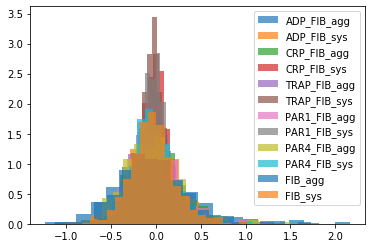

In [30]:
for p in predictions:
    plt.hist(predictions[p],alpha=0.7,bins=20,label=p,density=True)
plt.legend()

## Check dates of PFC2

In [303]:
pfc2_dates = pd.read_excel("%s/metadata_PF/EE2 Study_Platelet Function_KD_early file.xlsx" % data_dir)
pfc2_dates.SampleID = pfc2_dates.SampleID.astype(str)

In [306]:
all_pheno_df

,PROJECT,SAMPLE_ID,DATE,REST_FIB_1,REST_FIB_2,REST_PSEL_1,REST_PSEL_2,ADP_FIB_1,ADP_FIB_2,CRP_FIB_1,...,PAR1_PSEL_1,PAR1_PSEL_2,PAR4_FIB_1,PAR4_FIB_2,PAR4_PSEL_1,PAR4_PSEL_2,TRAP_FIB_1,TRAP_FIB_2,TRAP_PSEL_1,TRAP_PSEL_2
0,PFC_1,100010100138,08/01/05,2.22,2.91,NaN,NaN,30.74,28.15,51.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PFC_1,100010100139,08/01/05,3.22,2.84,NaN,NaN,27.77,25.39,72.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PFC_1,100010100140,08/01/05,3.52,3.28,NaN,NaN,32.35,28.99,47.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PFC_1,100010100141,08/01/05,2.19,2.93,NaN,NaN,27.31,33.07,60.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PFC_1,100010100142,08/01/05,3.60,3.68,NaN,NaN,7.52,8.47,28.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,PFC_4,C1A2PI,28/11/18,0.22,0.36,16.63,17.23,46.53,45.68,11.31,...,52.34,52.25,10.62,9.70,51.81,51.21,0.26,0.50,23.14,23.30
2138,PFC_4,C1A2RE,29/11/18,0.60,0.78,16.23,15.65,58.13,57.92,52.53,...,62.44,68.03,19.76,17.40,67.39,65.58,0.92,0.98,18.05,20.74
2139,PFC_4,C1A2TA,29/11/18,0.32,0.18,11.40,10.59,47.23,41.39,1.66,...,81.64,81.52,11.15,12.23,50.49,50.53,1.78,2.72,27.51,33.64
2140,PFC_4,C1A2X2,30/11/18,0.61,0.37,9.58,8.33,68.61,67.27,42.16,...,65.87,66.92,32.51,34.66,58.86,59.99,6.26,5.92,18.91,19.24


In [317]:
print(pfc2_dates.shape)
print(all_pheno_df.shape)

m.DATE = pd.to_datetime(m.DATE, format="%d/%m/%y")
print(m.shape)

(450, 3)
(2142, 27)
(450, 30)


Text(0, 0.5, 'Pheno file date')

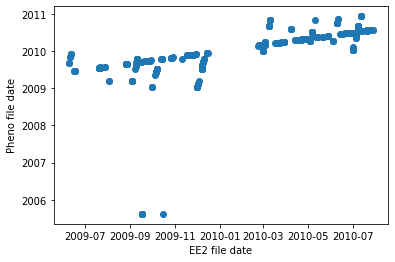

In [320]:
plt.figure()
plt.scatter(m.Date,m.DATE)
plt.xlabel("EE2 file date")
plt.ylabel("Pheno file date")

# Not yet useful

Check if we have the genotype

In [23]:
pfc_4_path = "/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/data_home/Genomes/S159_UKBBAffy_v1.0.fam"
gen_ids = pd.read_csv(pfc_4_path, delim_whitespace=True,header=-1)[1].tolist()
print("%d genotypes available for PFC_4 cohort, in %s" % (len(gen_ids),pfc_4_path))

nemunas_data_path = "/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/Nemunas_data"
matching = pd.read_csv("%s/metadata_PF/Genotyping" % nemunas_data_path,sep="\t")
matching = matching.dropna(how="all",axis=1)
matching = matching.rename(columns={"sampleid of tube":"tube_sample_id",
                                   "Proper Sample ID":"proper_sample_id"})

matching.loc[matching.SAMPLE_ID.isnull(),"SAMPLE_ID"] = \
    matching.loc[matching.SAMPLE_ID.isnull(),"tube_sample_id"]



ValueError: Passing negative integer to header is invalid. For no header, use header=None instead

In [17]:
matching.loc[matching.PROJECT == "PFC4"]

,PROJECT,SAMPLE_ID,RackID,SampleID_2,proper_sample_id,Blueprint_ID,Blueprint_ID2,CATGO_ID,CATGO_ID2,CATGO_ID3,CATGO_ID4,CATGO_ID5,Donor_ID,rack_id,well,tubeid,tube_sample_id
1919,PFC4,C18967,NaN,S15904007E,NaN,NaN,NaN,C189JI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15904007E,NaN
1920,PFC4,C18975,NaN,S15901120R,NaN,NaN,NaN,C189HM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15901120R,NaN
1921,PFC4,C189DU,NaN,S15904639R,NaN,NaN,NaN,C189FQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15904639R,NaN
1922,PFC4,C189KG,NaN,S15905004N,NaN,NaN,NaN,C189MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15905004N,NaN
1923,PFC4,C189UX,NaN,]C1S15903404Z,NaN,NaN,NaN,C189YP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15903404Z,NaN
1924,PFC4,C189WT,NaN,]C1S15904414X,NaN,NaN,NaN,C189XR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15904414X,NaN
1925,PFC4,C18A0F,NaN,]C1S15903612A,NaN,NaN,NaN,C18A39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15903612A,NaN
1926,PFC4,C18A1D,NaN,]C1S15905175Z,NaN,NaN,NaN,C18A2B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15905175Z,NaN
1927,PFC4,C18A47,NaN,]C1S15903640F,NaN,NaN,NaN,C18A55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15903640F,NaN
1928,PFC4,C18A63,NaN,]C1S15904638Q,NaN,NaN,NaN,C18A9Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S15904638Q,NaN


In [18]:
pheno_df_w_gen = pd.merge(pheno_df,
                          matching[["SAMPLE_ID","tubeid"]],
                          left_on="SAMPLE_ID",
                          right_on="SAMPLE_ID",how="inner")
pheno_df_w_gen["has_genotype"] = pheno_df_w_gen.tubeid.isin(gen_ids)
print("%d samples for which we have FC measurement and WB also have genotypes" % (pheno_df_w_gen["has_genotype"].sum()))

424 samples for which we have FC measurement and WB also have genotypes


In [20]:
pheno_df_w_gen[["SAMPLE_ID","tubeid","has_genotype"]].to_csv("/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/data_home/summaries/wb_fc.csv",index=False)